# Global Power Plant Database

Fuel Type Aggregation We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction : Make two prediction 1) Primary Fuel 2) capacity_mw

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset:
df=pd.read_csv('C:/Users/Azhar1/Documents/FlipRobo/Project_Evaluation/Project_Phase 2/Global Power Plant Database.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.shape

(907, 27)

The dimension of our data is 908 rows * 27 columns

In [5]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

There are float and object datatypes in our data.

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381062,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


Standard deviation is zero for columns "generation_gwh_2019, estimated generation growth", we can drop off these columns as they do not have any data.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [11]:
#printing the unique values available in the dataset

for i in df.columns:
    print(df[i].value_counts())
    print('*'*75)

IND    907
Name: country, dtype: int64
***************************************************************************
India    907
Name: country_long, dtype: int64
***************************************************************************
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64
***************************************************************************
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64
***************************************************************************
5.0       39
10.0      22
600.0    

In [13]:
#checking the number of null values present in each columns 

df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

1. There are lot of missing values in the dataset.
2. Country and Country long columns have only one value, which can be dropped off while implementing our models as they do not have any inference.
3. Gppd_idnr is unique value for the power plants, hence they can be dropped off. So, does the url column.
4. 'year of capacity data', 'other fuel2' has only one value and 'Other fuel3' and 'wepp id' has null values.

In [14]:
#dropping the unwanted columns which are having no related information for data analysis
df.drop(columns=['country','country_long','gppd_idnr','url','generation_data_source','other_fuel1','other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','generation_gwh_2013','generation_gwh_2019','year_of_capacity_data'], inplace=True)
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [15]:
# Checking the unique values in each column
for column in df.columns:
    print(f"{column}: No of unique values {df[column].nunique()}")

name: No of unique values 907
capacity_mw: No of unique values 361
latitude: No of unique values 836
longitude: No of unique values 827
primary_fuel: No of unique values 8
commissioning_year: No of unique values 73
owner: No of unique values 280
source: No of unique values 191
geolocation_source: No of unique values 3
generation_gwh_2014: No of unique values 371
generation_gwh_2015: No of unique values 396
generation_gwh_2016: No of unique values 403
generation_gwh_2017: No of unique values 408
generation_gwh_2018: No of unique values 410


In [16]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.051309,0.197129,0.304087,0.839094,0.844352,0.870620,0.886673,0.901918
latitude,0.051309,1.000000,0.036362,0.129902,0.060330,0.048610,0.041387,0.040568,0.040476
longitude,0.197129,0.036362,1.000000,0.121910,0.013511,0.022760,0.050732,0.048678,0.045599
commissioning_year,0.304087,0.129902,0.121910,1.000000,0.160014,0.170363,0.193743,0.191367,0.193694
generation_gwh_2014,0.839094,0.060330,0.013511,0.160014,1.000000,0.961098,0.937060,0.912561,0.902781
generation_gwh_2015,0.844352,0.048610,0.022760,0.170363,0.961098,1.000000,0.974918,0.940191,0.934371
generation_gwh_2016,0.870620,0.041387,0.050732,0.193743,0.937060,0.974918,1.000000,0.972024,0.962073
generation_gwh_2017,0.886673,0.040568,0.048678,0.191367,0.912561,0.940191,0.972024,1.000000,0.985856
generation_gwh_2018,0.901918,0.040476,0.045599,0.193694,0.902781,0.934371,0.962073,0.985856,1.000000


# Data Visualization

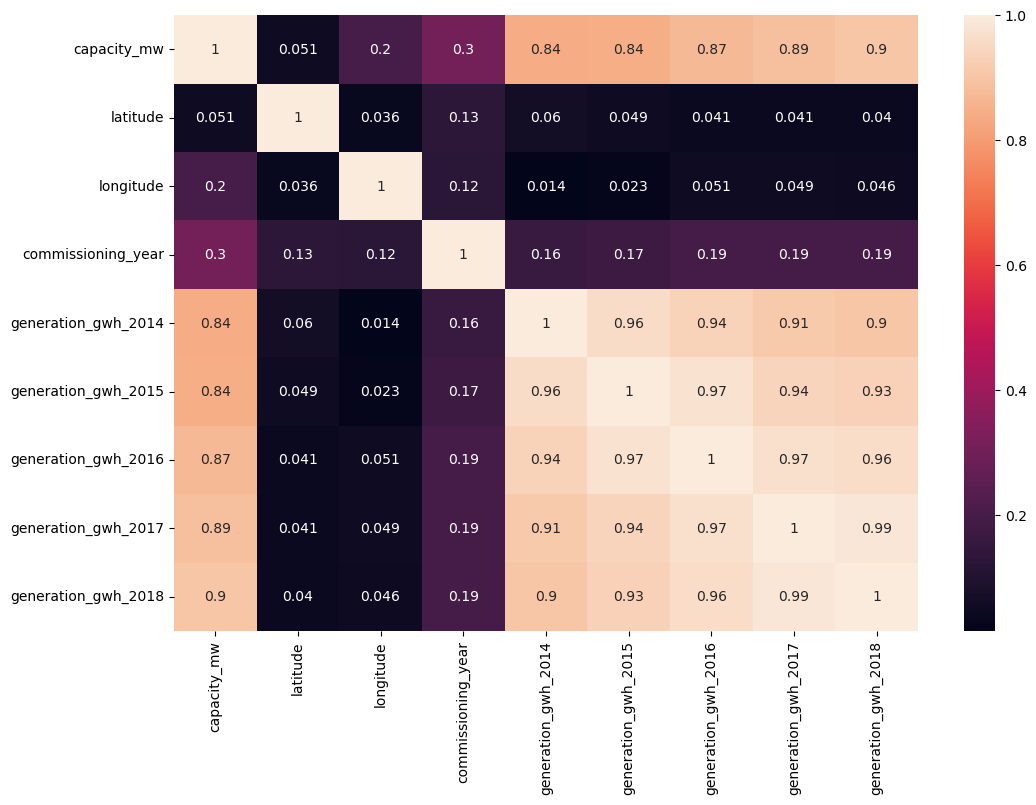

In [17]:
#Showing the attributes are related to each other can be seen by plotting the heatmap over the attributes correlation value
corr = df.corr()
plt.figure(figsize=(12,8), facecolor='white')
sns.heatmap(corr, annot=True)
plt.show()

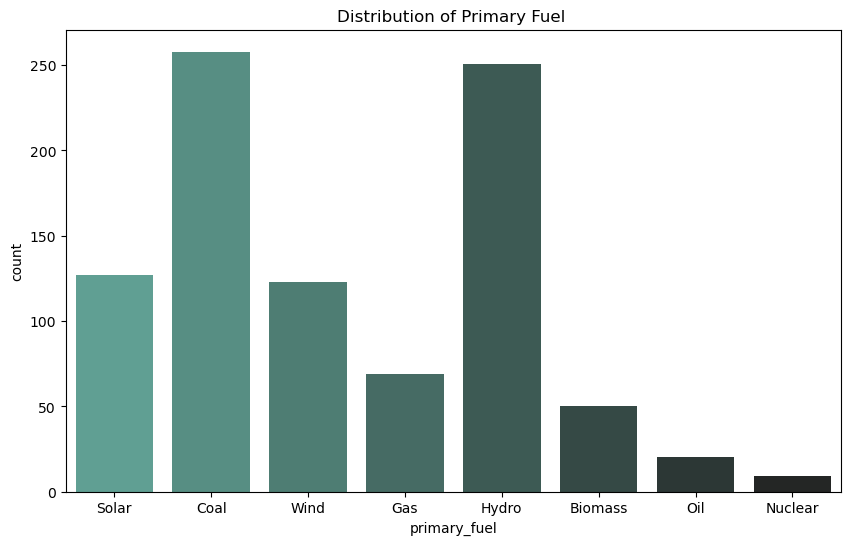

In [34]:
#Checking the types and counts of primary fuel

plt.figure(figsize=(10,6))
sns.countplot(x='primary_fuel', data=df,palette='dark:#5A9_r')
plt.title("Distribution of Primary Fuel ")
plt.show()

1. Coal is the majority contributor in the power generation.
2. Second highest power generation is done by Hydropower.

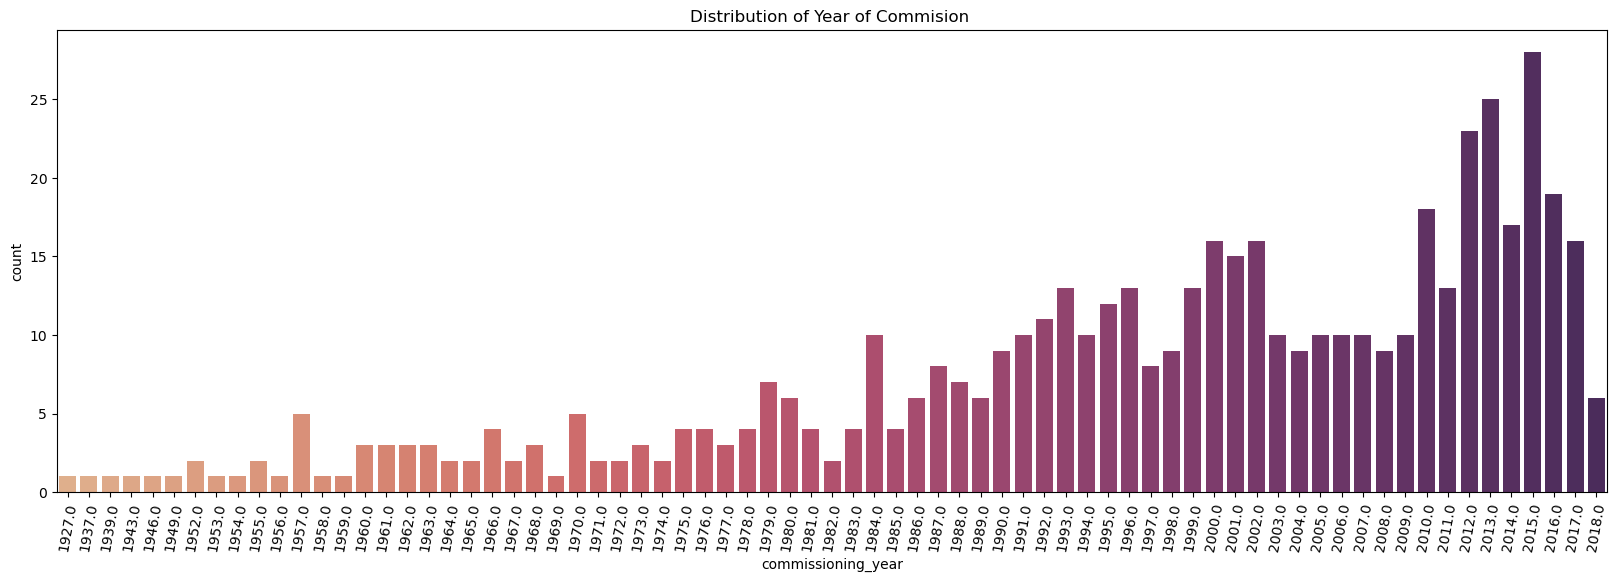

In [32]:
# Visualizing commission of year

plt.figure(figsize=(20,6))
sns.countplot(x='commissioning_year', data=df,palette='flare')
plt.xlabel('commissioning_year')
plt.xticks(rotation=80)
plt.title("Distribution of Year of Commision ")
plt.show()

1. It can be seen that after year 2000 power genertion is substantially increased. 
2. Power generation was highest in the year 2015.

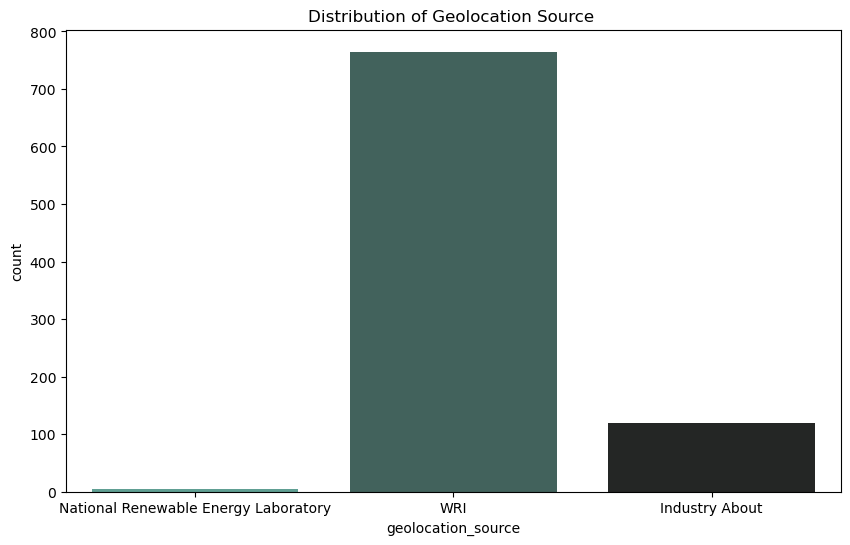

In [33]:
# Checking the power plants as per Geoloacation
plt.figure(figsize=(10,6))
sns.countplot(x='geolocation_source', data=df,palette='dark:#5A9_r')
plt.title("Distribution of Geolocation Source ")
plt.show()

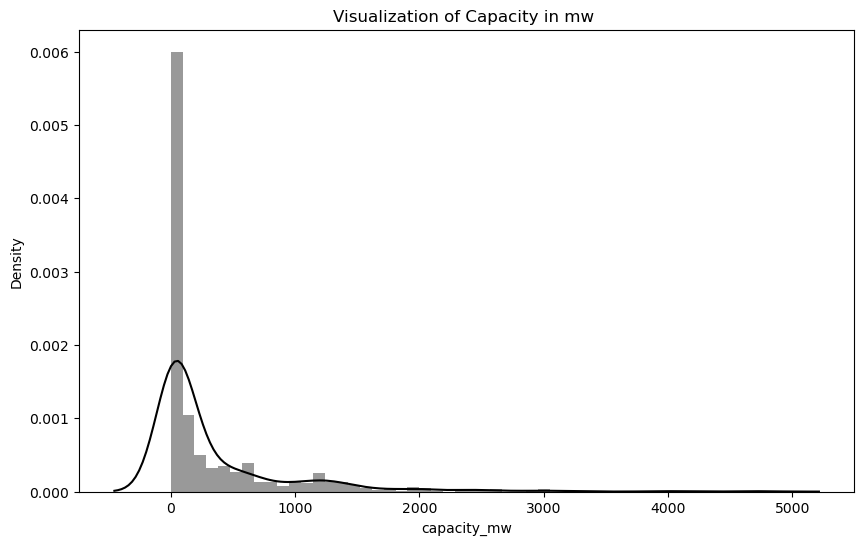

In [36]:
plt.figure(figsize=(10,6))
sns.distplot(df['capacity_mw'],color='black')
plt.title("Visualization of Capacity in mw ")
plt.show()

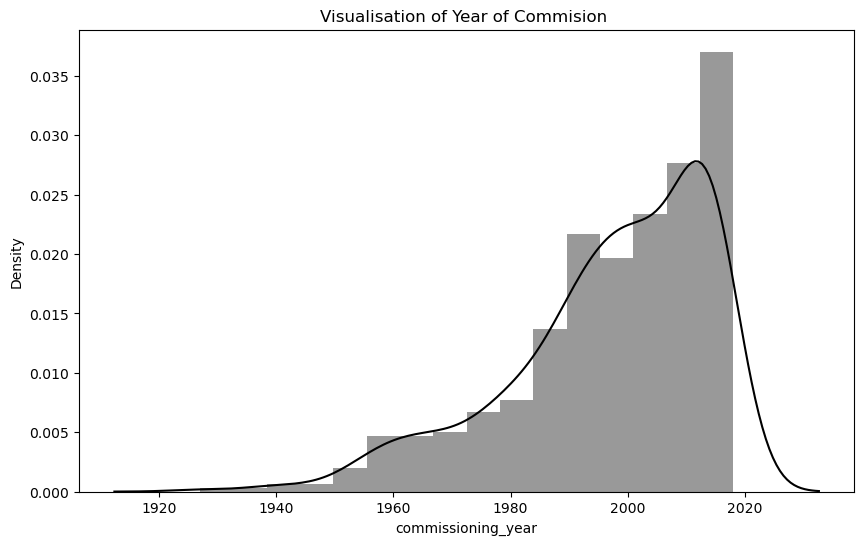

In [38]:
plt.figure(figsize=(10,6))
sns.distplot(df['commissioning_year'],color='black')
plt.title("Visualisation of Year of Commision ")
plt.show()

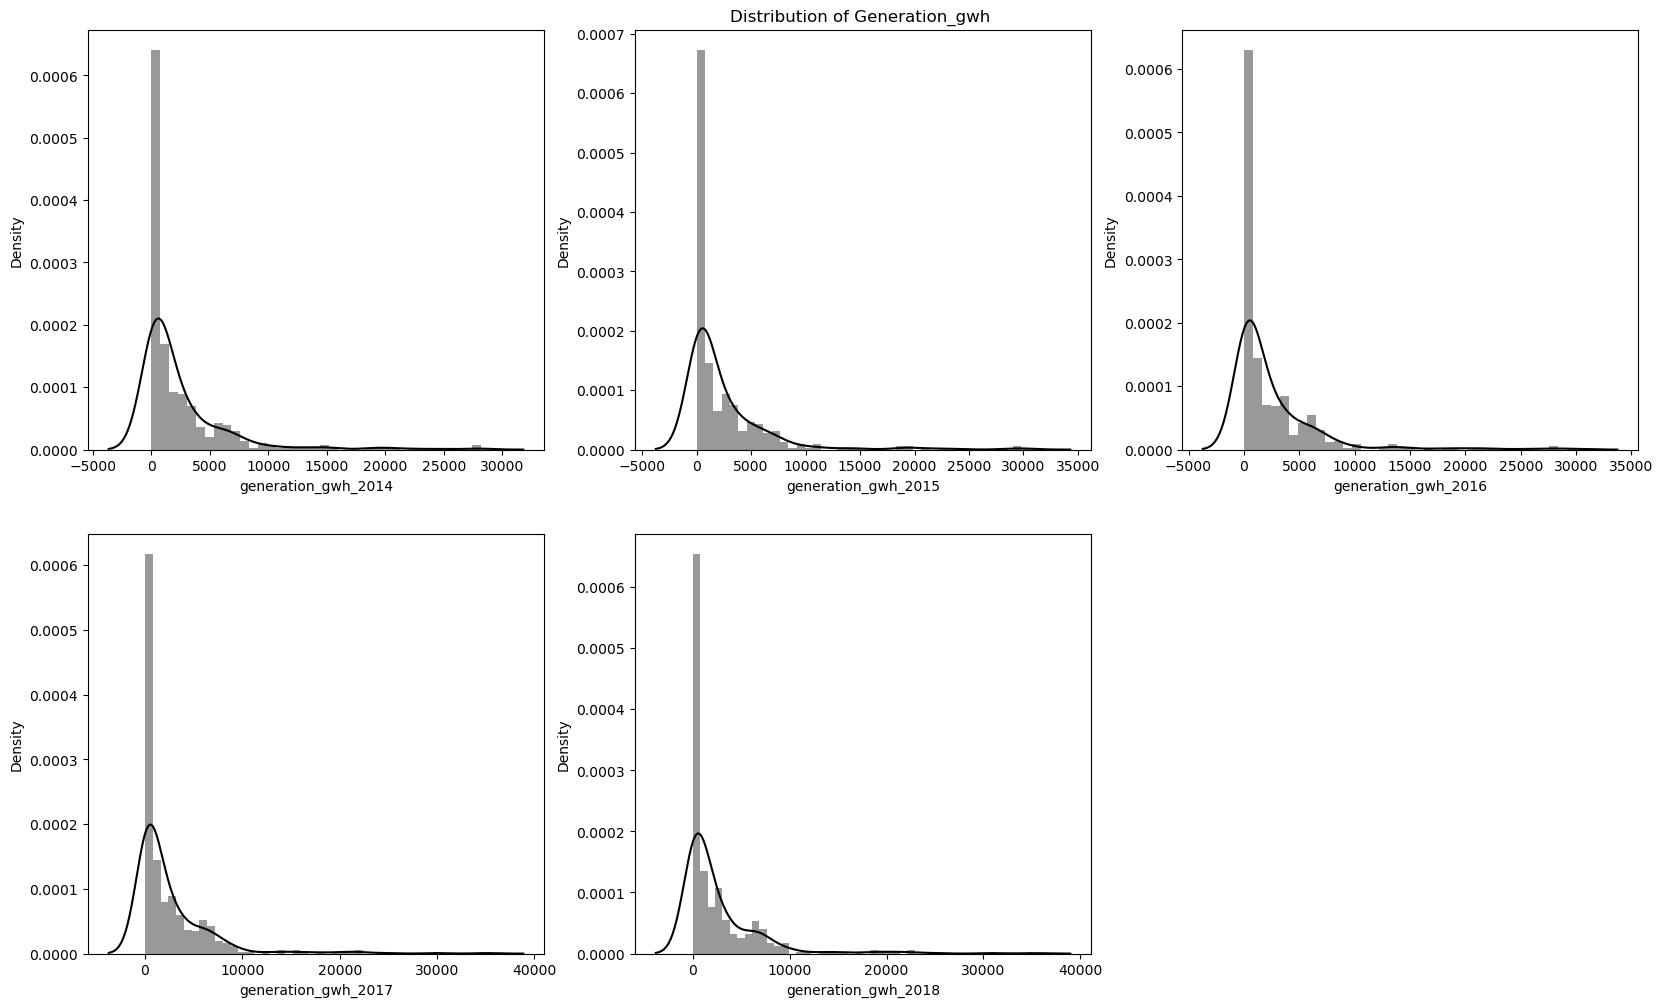

In [39]:
plt.figure(figsize=(20,12))
ax= plt.subplot(2,3,1)
sns.distplot(df['generation_gwh_2014'],color='black')

ax= plt.subplot(2,3,2)
sns.distplot(df['generation_gwh_2015'],color='black')
plt.title("Distribution of Generation_gwh ")

ax= plt.subplot(2,3,3)
sns.distplot(df['generation_gwh_2016'],color='black')

ax= plt.subplot(2,3,4)
sns.distplot(df['generation_gwh_2017'],color='black')

ax= plt.subplot(2,3,5)
sns.distplot(df['generation_gwh_2018'],color='black')


plt.show()

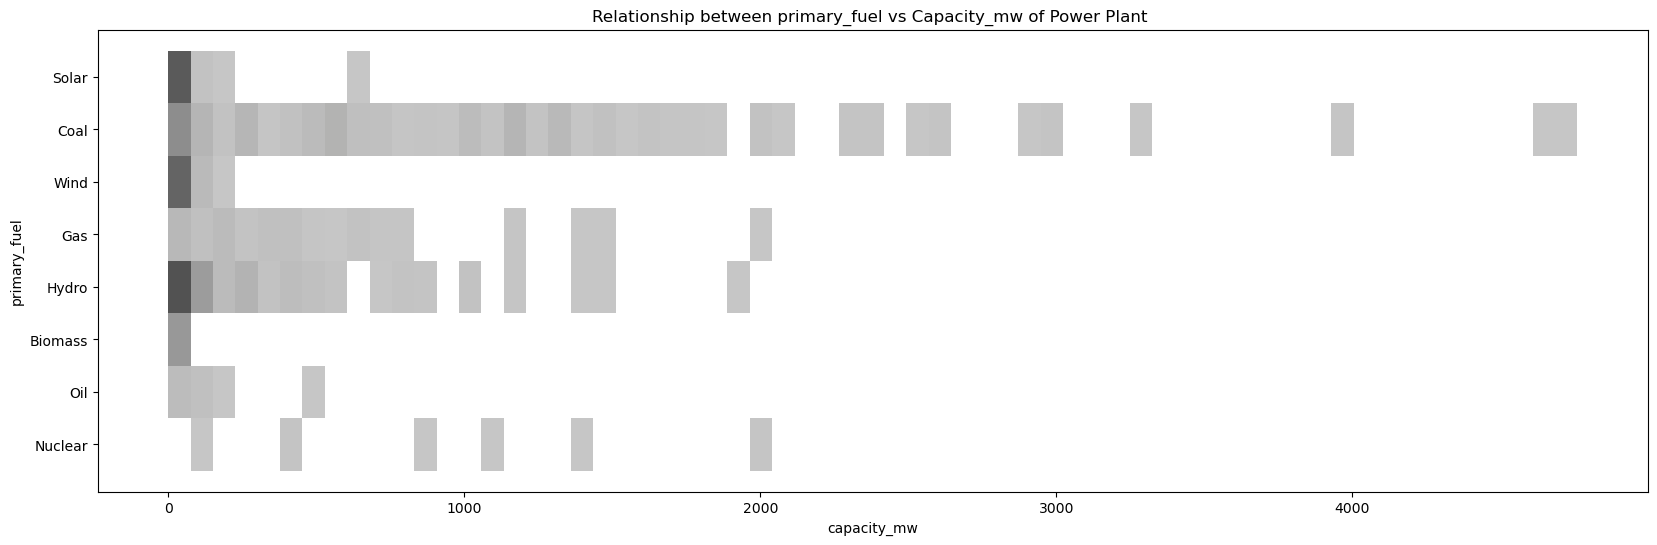

In [42]:
plt.figure(figsize=(20,6))
sns.histplot(x='capacity_mw',y='primary_fuel', data=df,color='black')
plt.title("Relationship between primary_fuel vs Capacity_mw of Power Plant ")
plt.show()

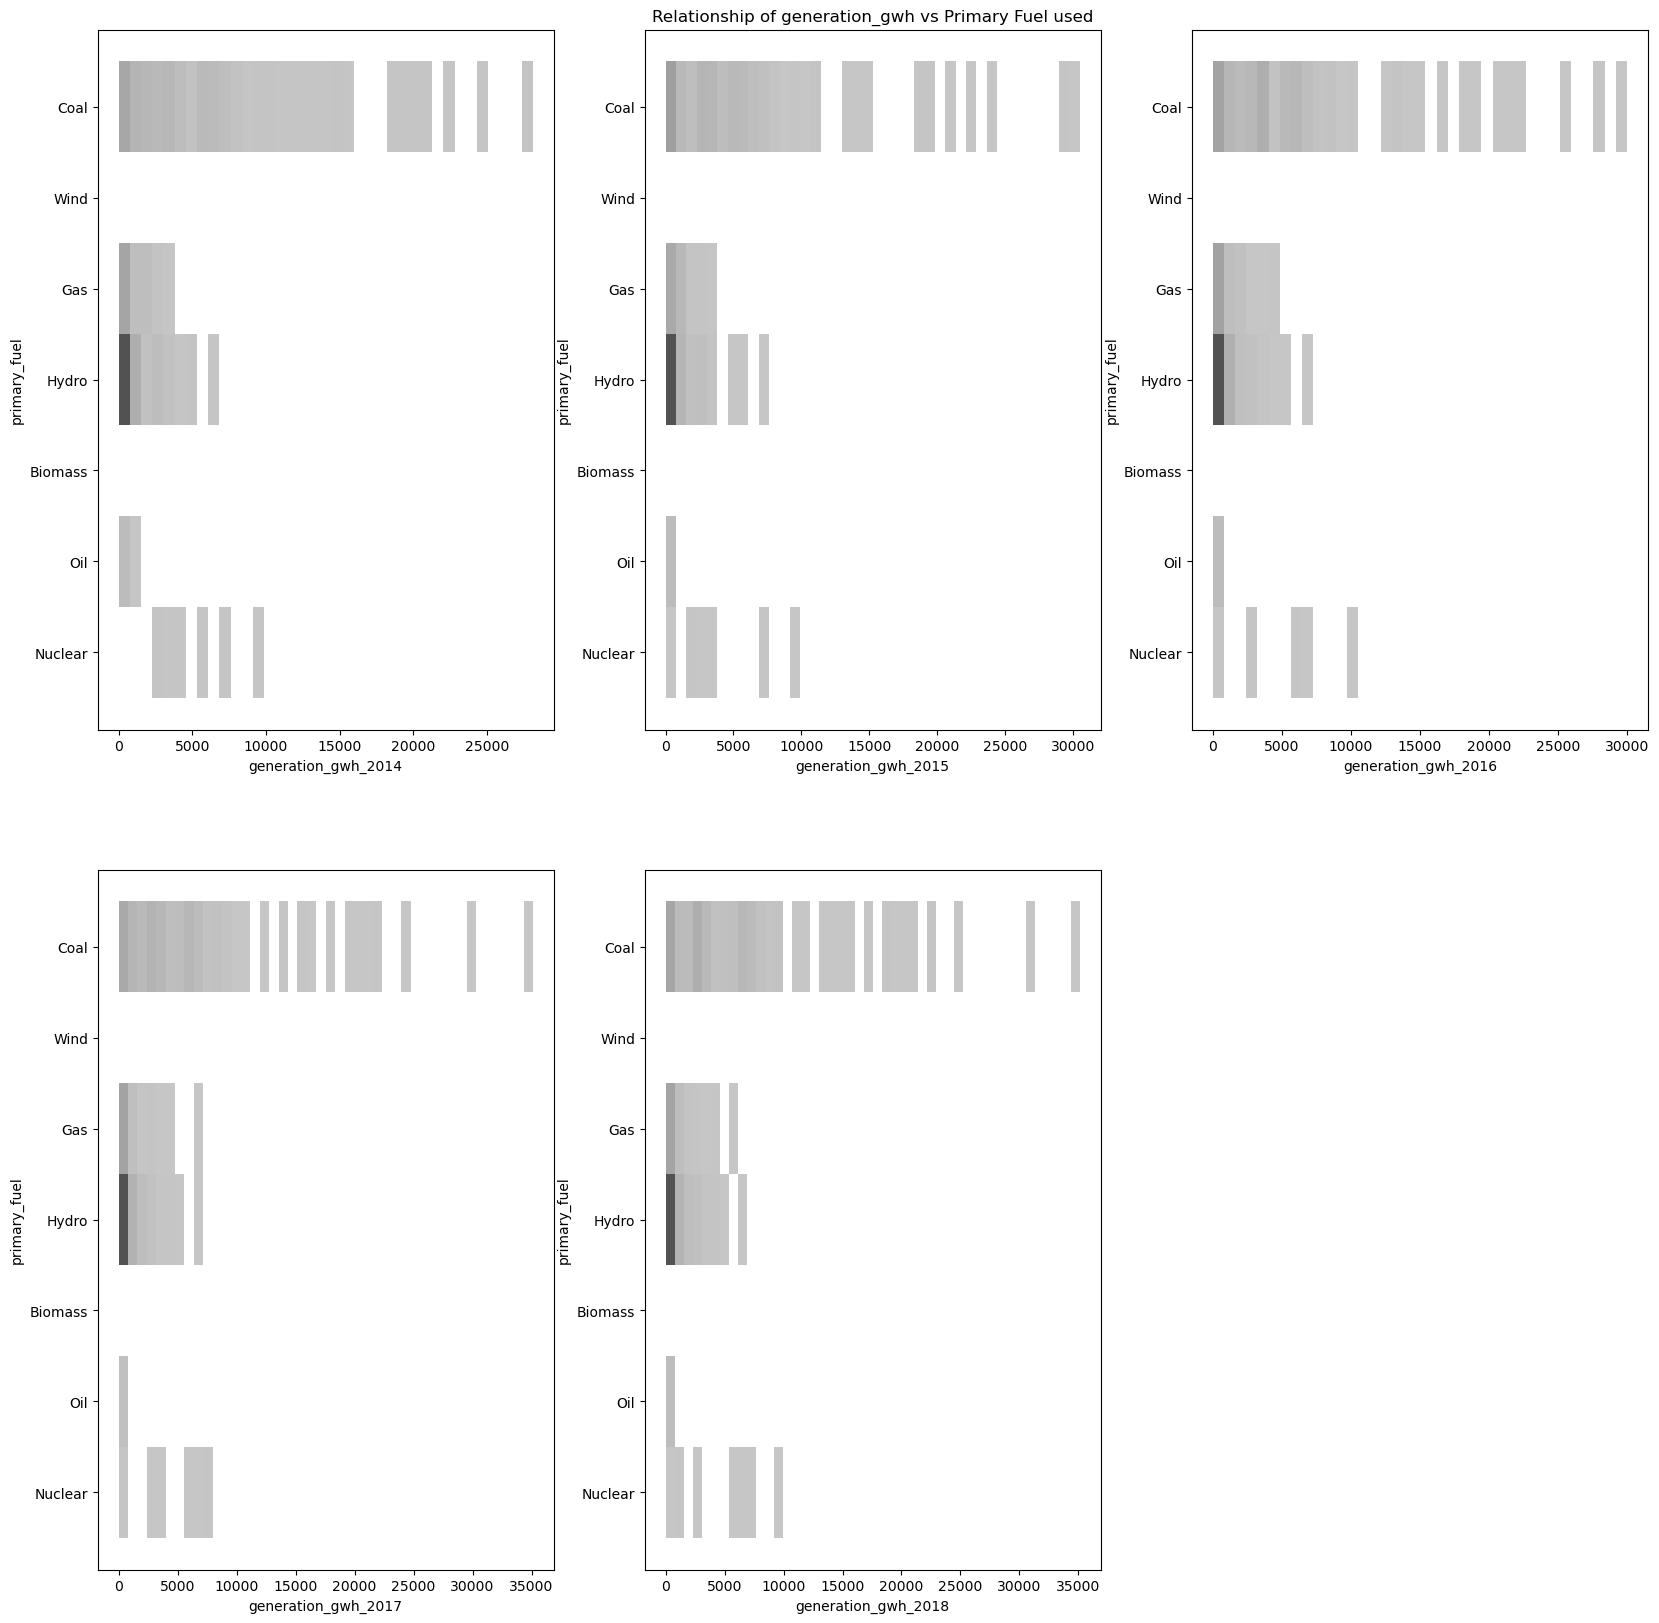

In [43]:
plt.figure(figsize=(20,20))
ax = plt.subplot(2,3,1)
sns.histplot(x='generation_gwh_2014',y='primary_fuel', data=df,color='black')
ax = plt.subplot(2,3,2)
sns.histplot(x='generation_gwh_2015',y='primary_fuel', data=df,color='black')
plt.title("Relationship of generation_gwh vs Primary Fuel used")
ax = plt.subplot(2,3,3)
sns.histplot(x='generation_gwh_2016',y='primary_fuel', data=df,color='black')
ax = plt.subplot(2,3,4)
sns.histplot(x='generation_gwh_2017',y='primary_fuel', data=df,color='black')
ax = plt.subplot(2,3,5)
sns.histplot(x='generation_gwh_2018',y='primary_fuel', data=df,color='black')
plt.show()

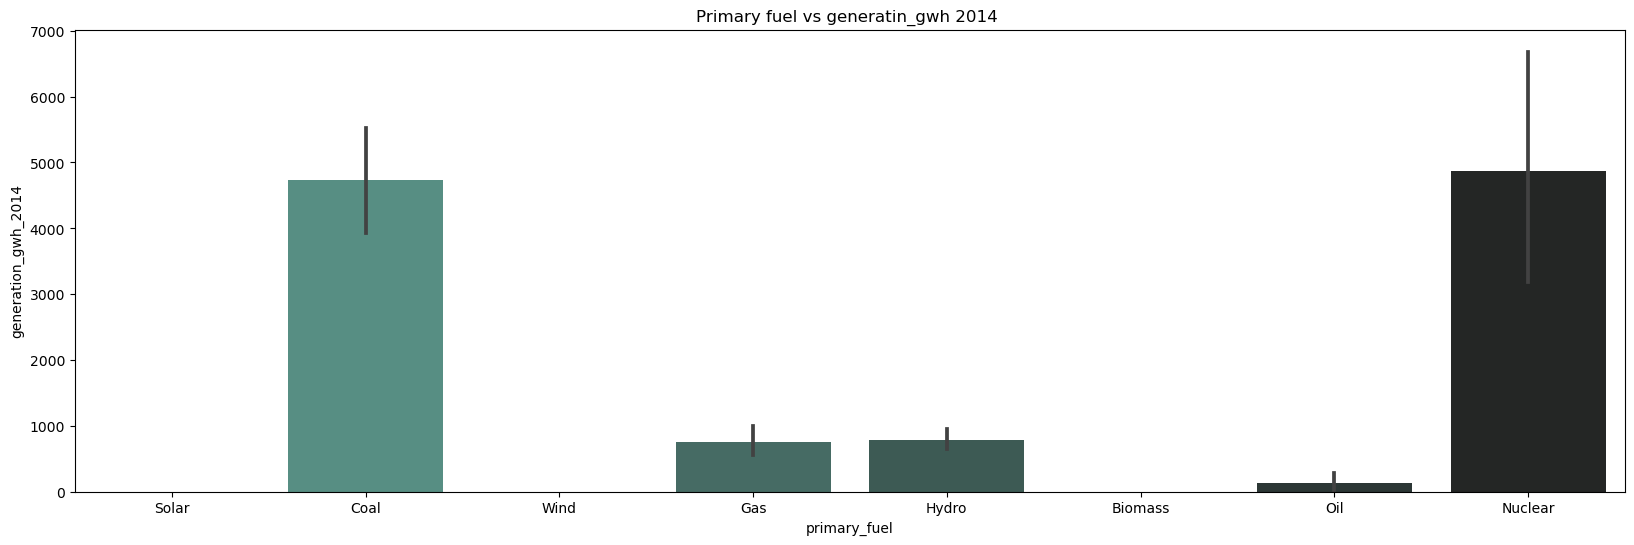

In [45]:
plt.figure(figsize=(20,6))
ax = (2,1,2)
sns.barplot(x='primary_fuel',y='generation_gwh_2014', data=df, palette='dark:#5A9_r')
plt.title("Primary fuel vs generatin_gwh 2014 ")
plt.show()

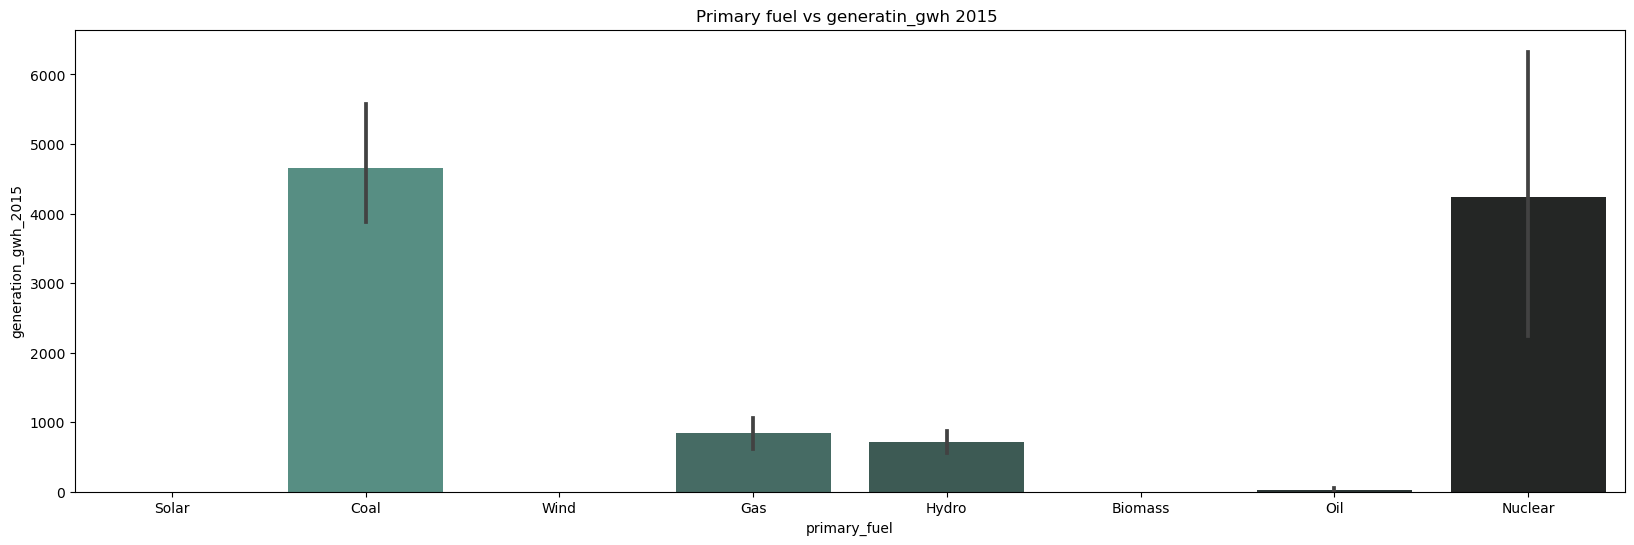

In [46]:
plt.figure(figsize=(20,6))
ax = (2,1,2)
sns.barplot(x='primary_fuel',y='generation_gwh_2015', data=df, palette='dark:#5A9_r')
plt.title("Primary fuel vs generatin_gwh 2015 ")
plt.show()

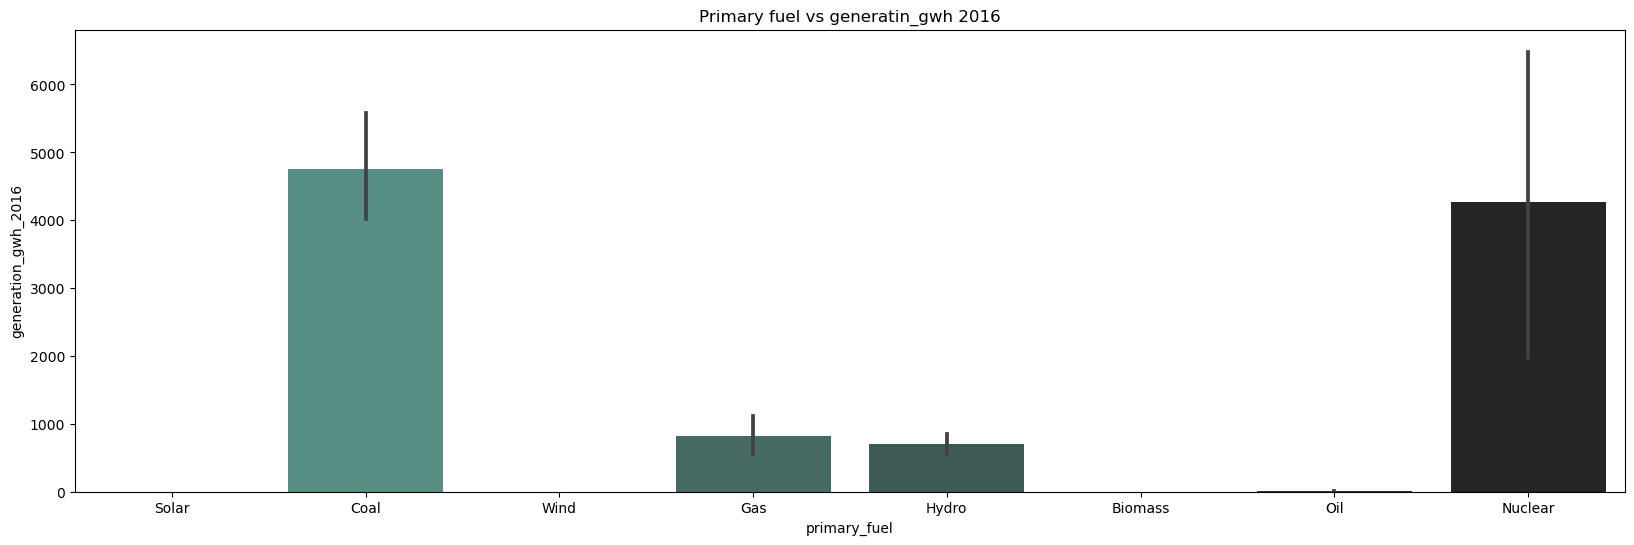

In [47]:
plt.figure(figsize=(20,6))
ax = (2,1,2)
sns.barplot(x='primary_fuel',y='generation_gwh_2016', data=df, palette='dark:#5A9_r')
plt.title("Primary fuel vs generatin_gwh 2016")
plt.show()

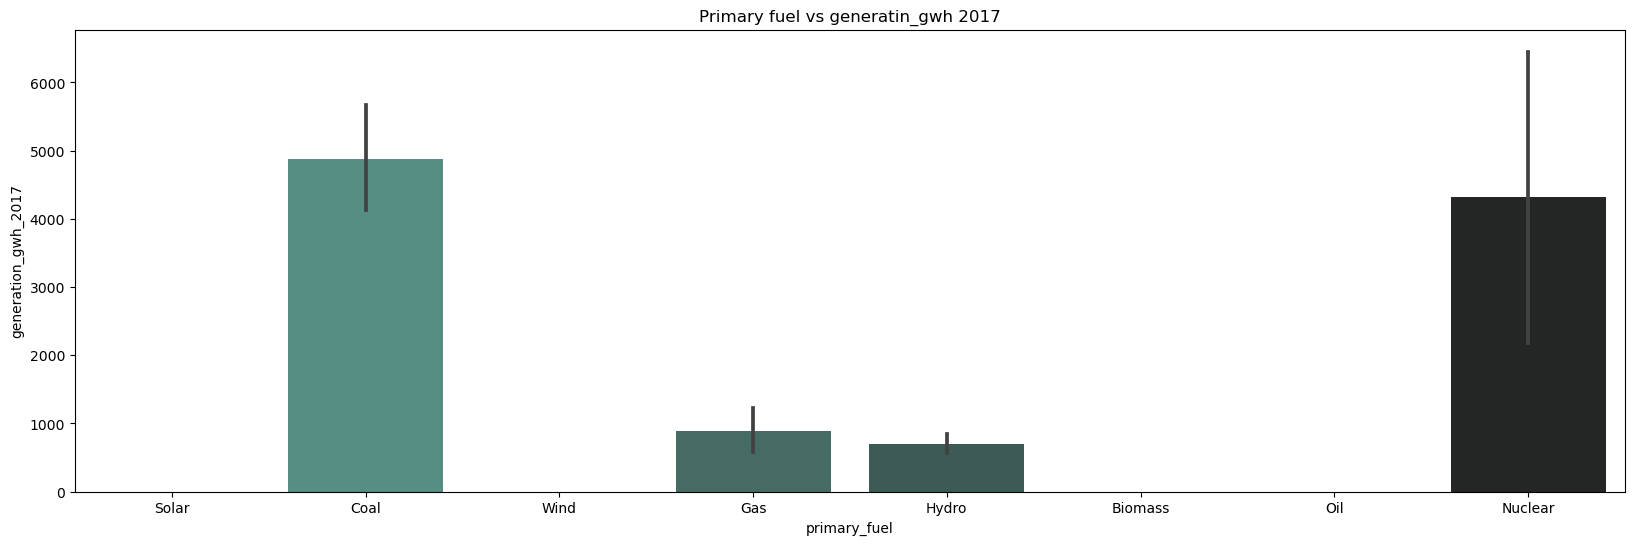

In [48]:
plt.figure(figsize=(20,6))
ax = (2,1,2)
sns.barplot(x='primary_fuel',y='generation_gwh_2017', data=df, palette='dark:#5A9_r')
plt.title("Primary fuel vs generatin_gwh 2017")
plt.show()

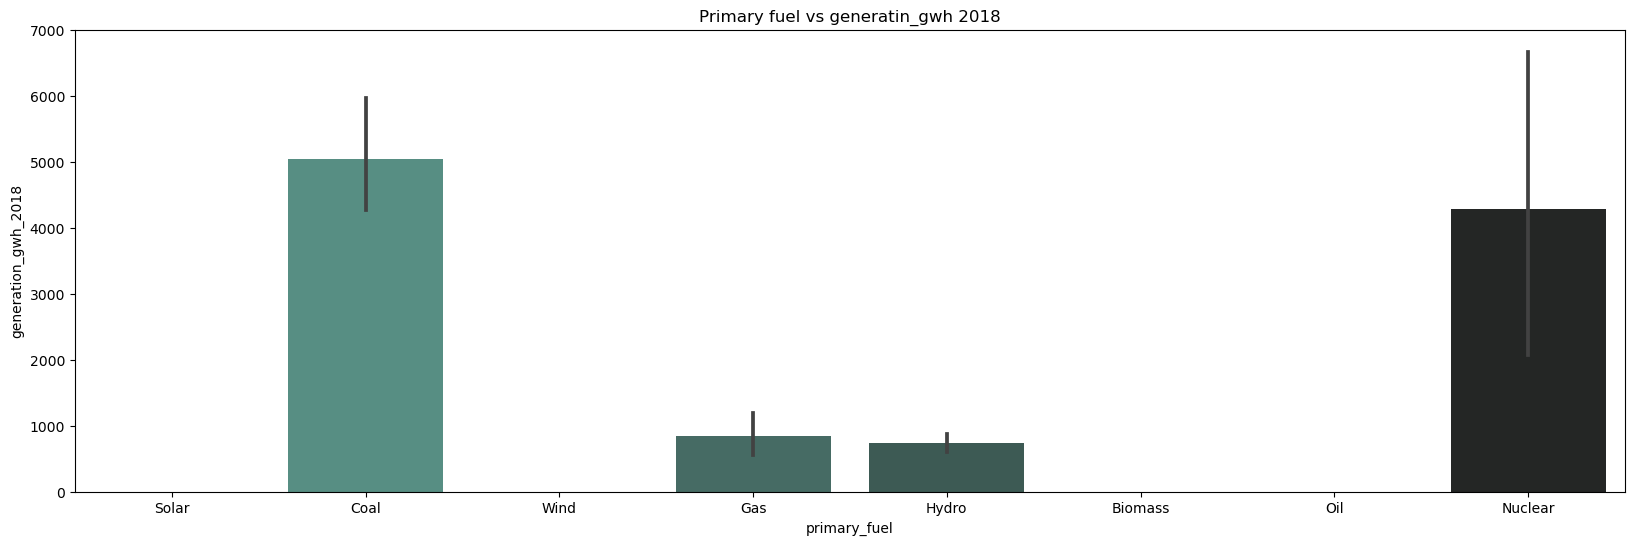

In [49]:
plt.figure(figsize=(20,6))
ax = (2,1,2)
sns.barplot(x='primary_fuel',y='generation_gwh_2018', data=df, palette='dark:#5A9_r')
plt.title("Primary fuel vs generatin_gwh 2018")
plt.show()

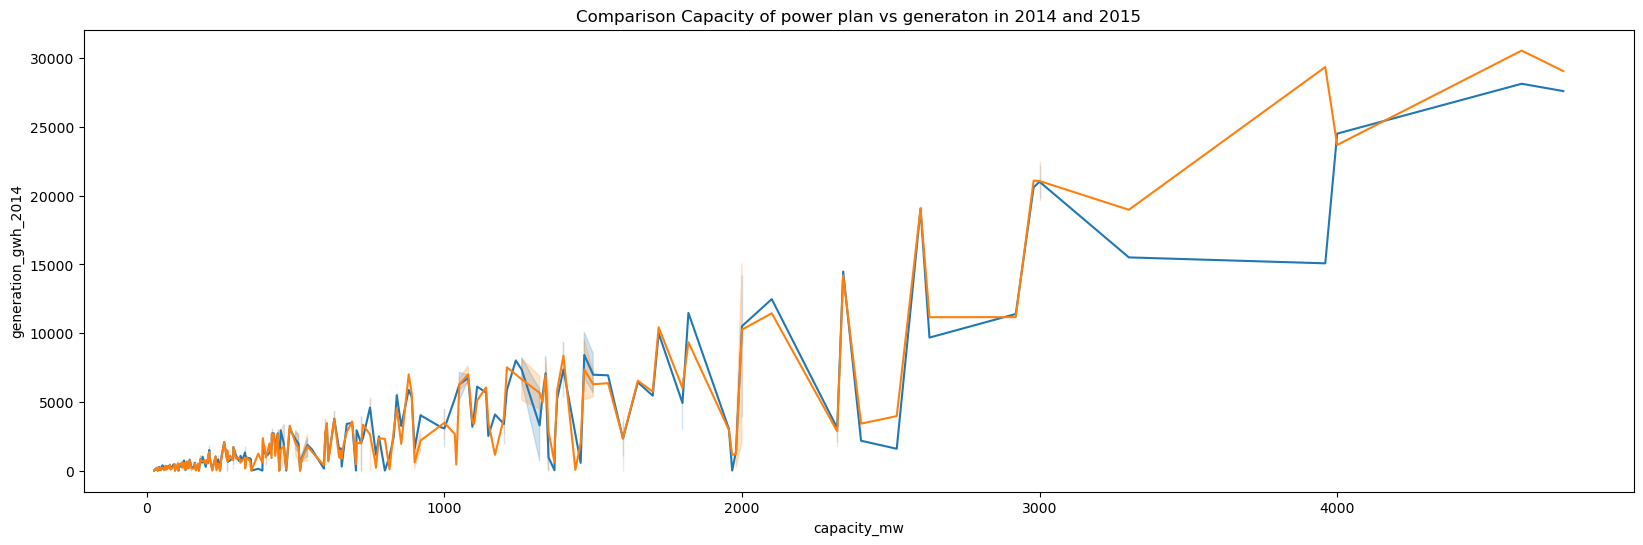

In [50]:
plt.figure(figsize=(20,6))
sns.lineplot(x='capacity_mw',y='generation_gwh_2014', data=df)
sns.lineplot(x='capacity_mw',y='generation_gwh_2015', data=df)
plt.title("Comparison Capacity of power plan vs generaton in 2014 and 2015")
plt.show()

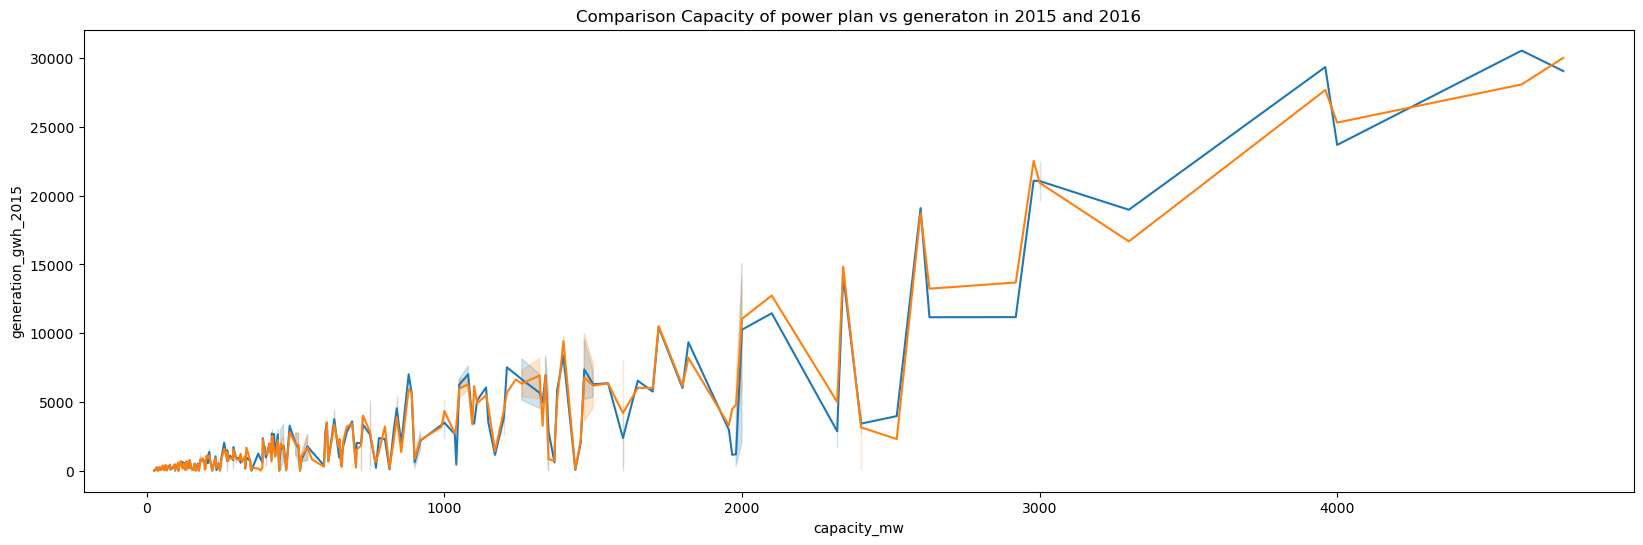

In [52]:
plt.figure(figsize=(20,6))
sns.lineplot(x='capacity_mw',y='generation_gwh_2015', data=df)
sns.lineplot(x='capacity_mw',y='generation_gwh_2016', data=df)
plt.title("Comparison Capacity of power plan vs generaton in 2015 and 2016")
plt.show()

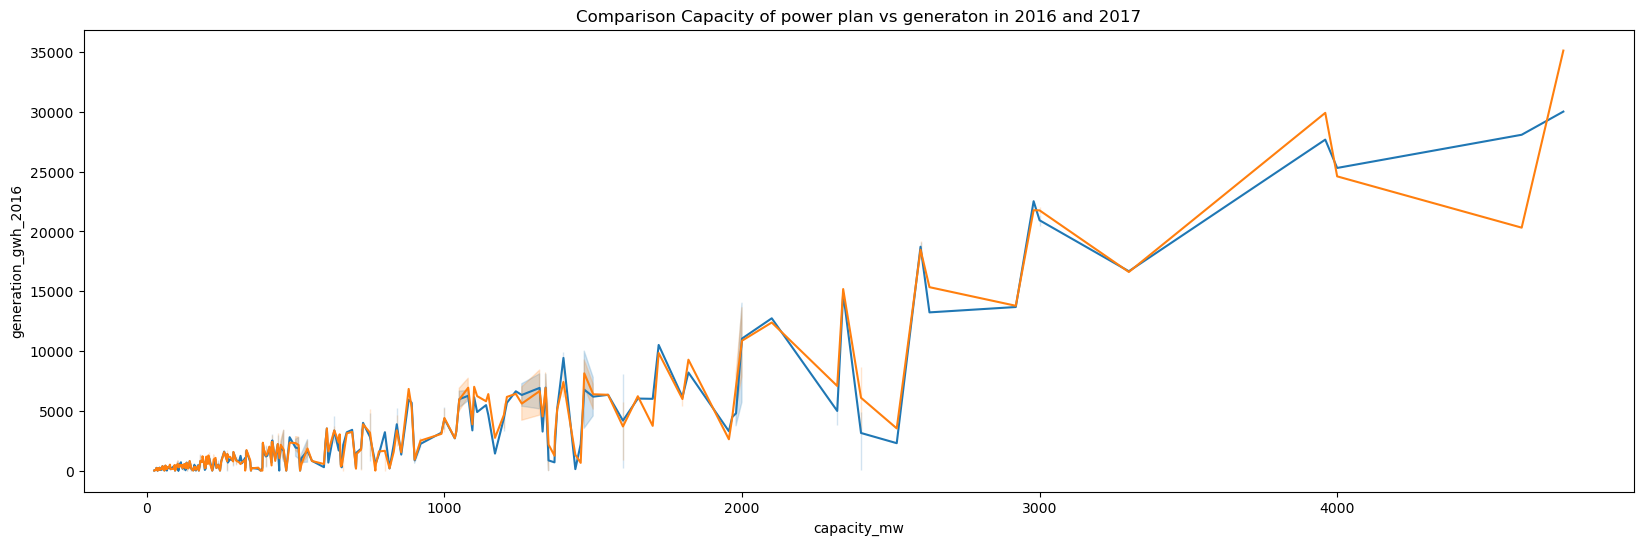

In [54]:
plt.figure(figsize=(20,6))
sns.lineplot(x='capacity_mw',y='generation_gwh_2016', data=df)
sns.lineplot(x='capacity_mw',y='generation_gwh_2017', data=df)
plt.title("Comparison Capacity of power plan vs generaton in 2016 and 2017")
plt.show()

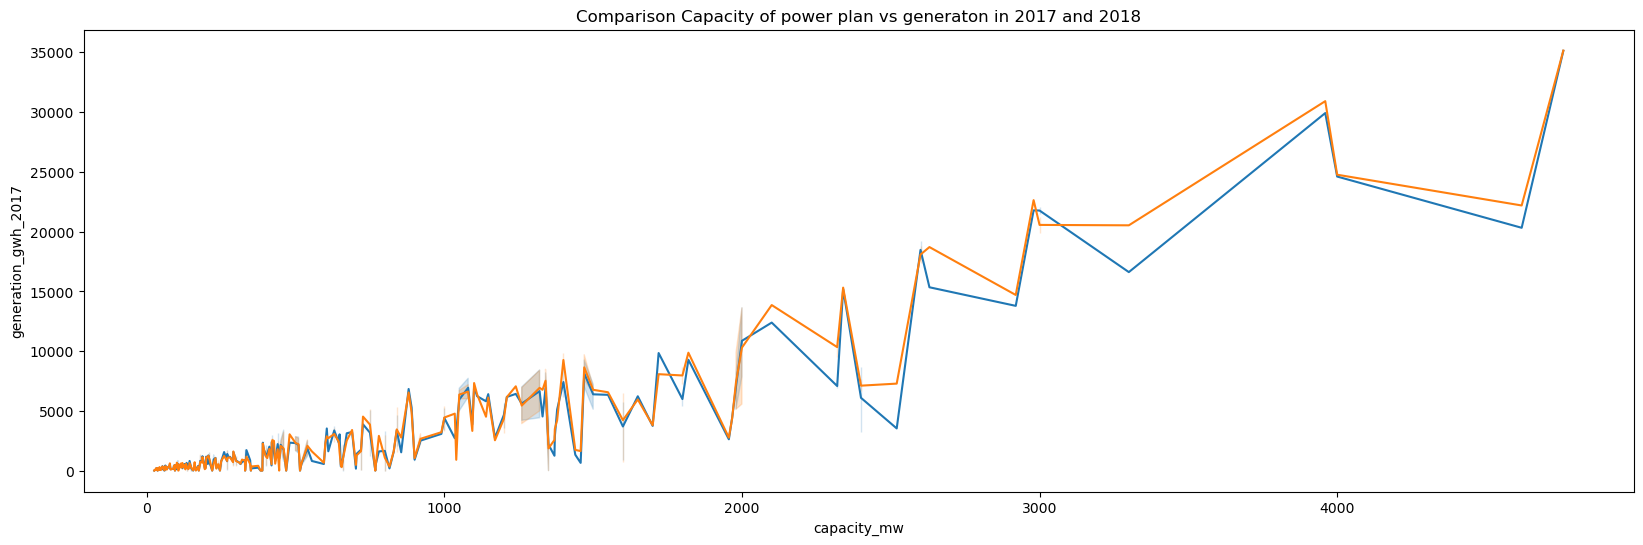

In [55]:
plt.figure(figsize=(20,6))
sns.lineplot(x='capacity_mw',y='generation_gwh_2017', data=df)
sns.lineplot(x='capacity_mw',y='generation_gwh_2018', data=df)
plt.title("Comparison Capacity of power plan vs generaton in 2017 and 2018")
plt.show()

<Figure size 1000x800 with 0 Axes>

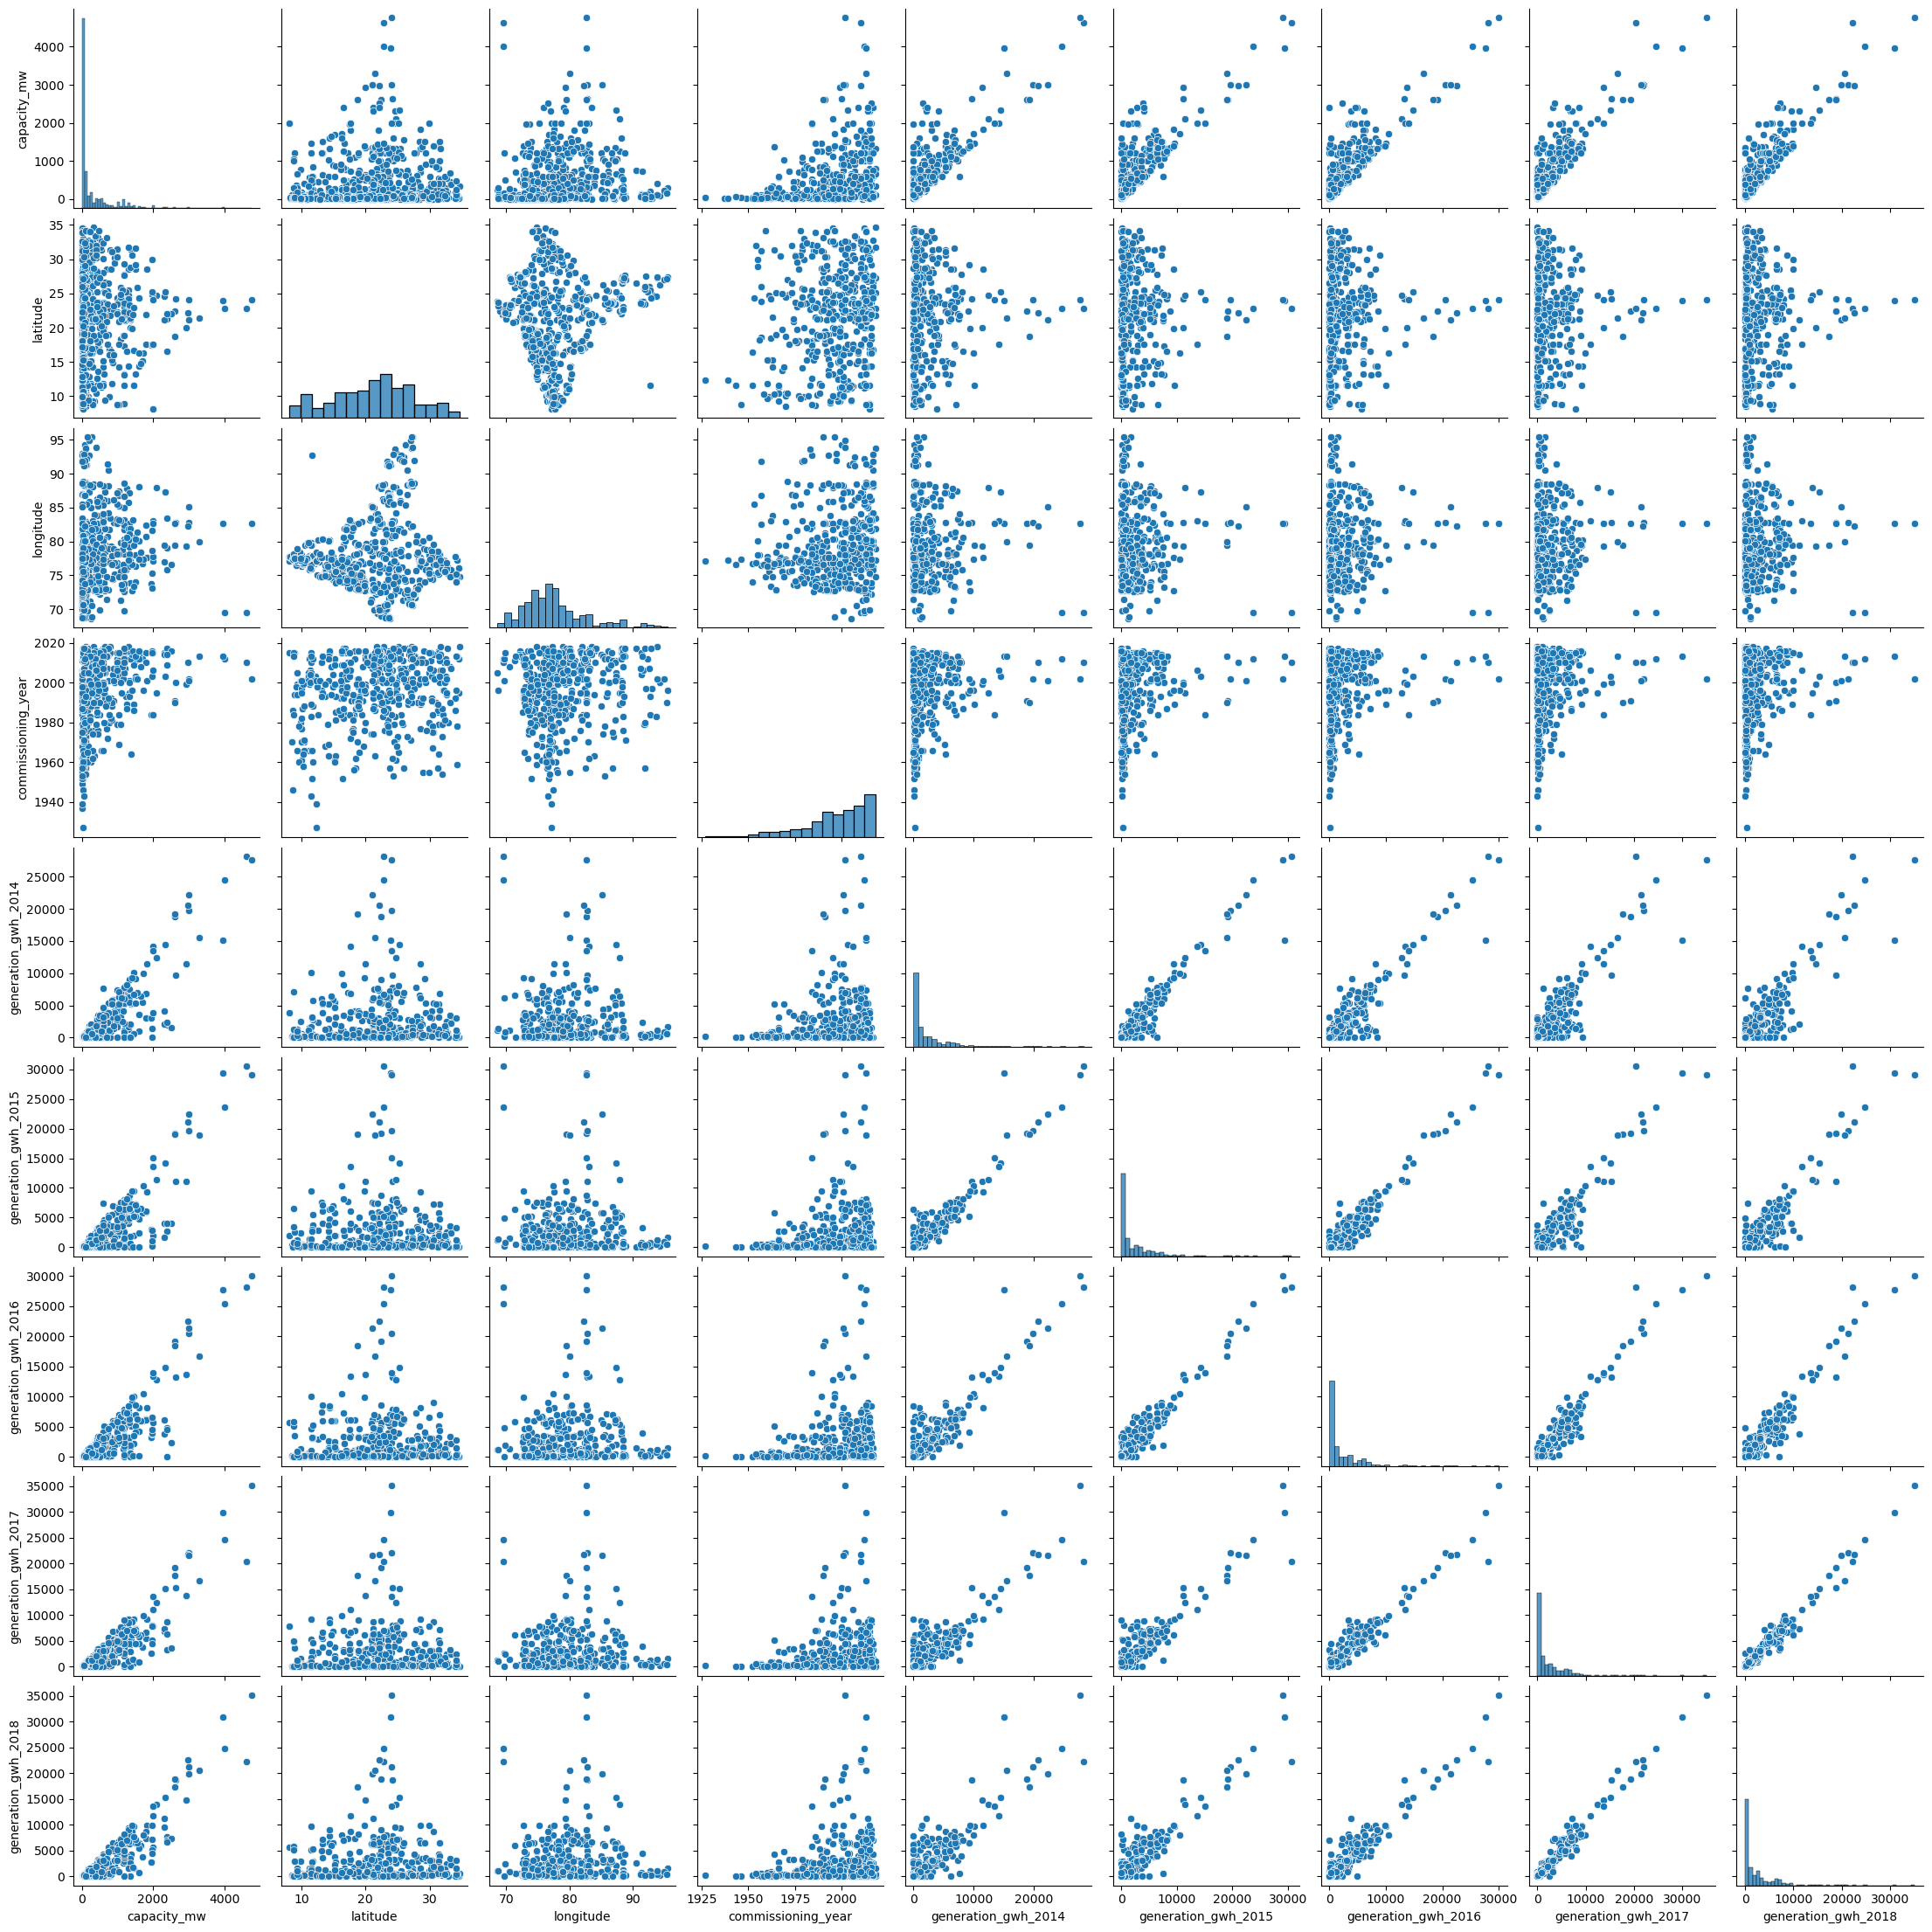

In [56]:
plt.figure(figsize=(10,8))
sns.pairplot(df )
plt.show()

# Now, we will deal with missing values and converting object datatype column

In [59]:
#Checking missing values and datatypes of all the columns
print(df.isnull().sum())
print('\n',df.dtypes)

name                     0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  565
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

 name                    object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year     float64
owner                   object
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object


In [60]:
#filling missing values of lattitude and longitude with their mean value.

df['latitude'].fillna(df['latitude'].mean(),inplace=True)
df['longitude'].fillna(df['latitude'].mean(),inplace=True)

In [61]:
#filling generation_gwh_year values to their median values
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median(),inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median(),inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(),inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median(),inplace=True)
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median(),inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].median(), inplace=True)

In [62]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df1=LE.fit_transform(df['primary_fuel'])
df2 = LE.fit_transform(df['geolocation_source'])


In [63]:
pd.Series(df1)
df['primary_fuel']=df1
df['geolocation_source']=df2

In [64]:
#checking the datatypes again
df.dtypes

name                    object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
commissioning_year     float64
owner                   object
source                  object
geolocation_source       int32
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [66]:
df.isna().sum()

name                     0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
owner                  565
source                   0
geolocation_source       0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

Dropping columns 'name','owner' and 'source' as they are less useful to our analysis.


In [68]:
df.drop(columns=['name','owner','source'], inplace=True)

In [69]:
df.isna().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [70]:
from sklearn.preprocessing import PowerTransformer,StandardScaler

pwr_tfr = PowerTransformer(method='yeo-johnson')
col = ['capacity_mw', 'commissioning_year', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018','geolocation_source','longitude']
df[col] = pwr_tfr.fit_transform(df[col].values)

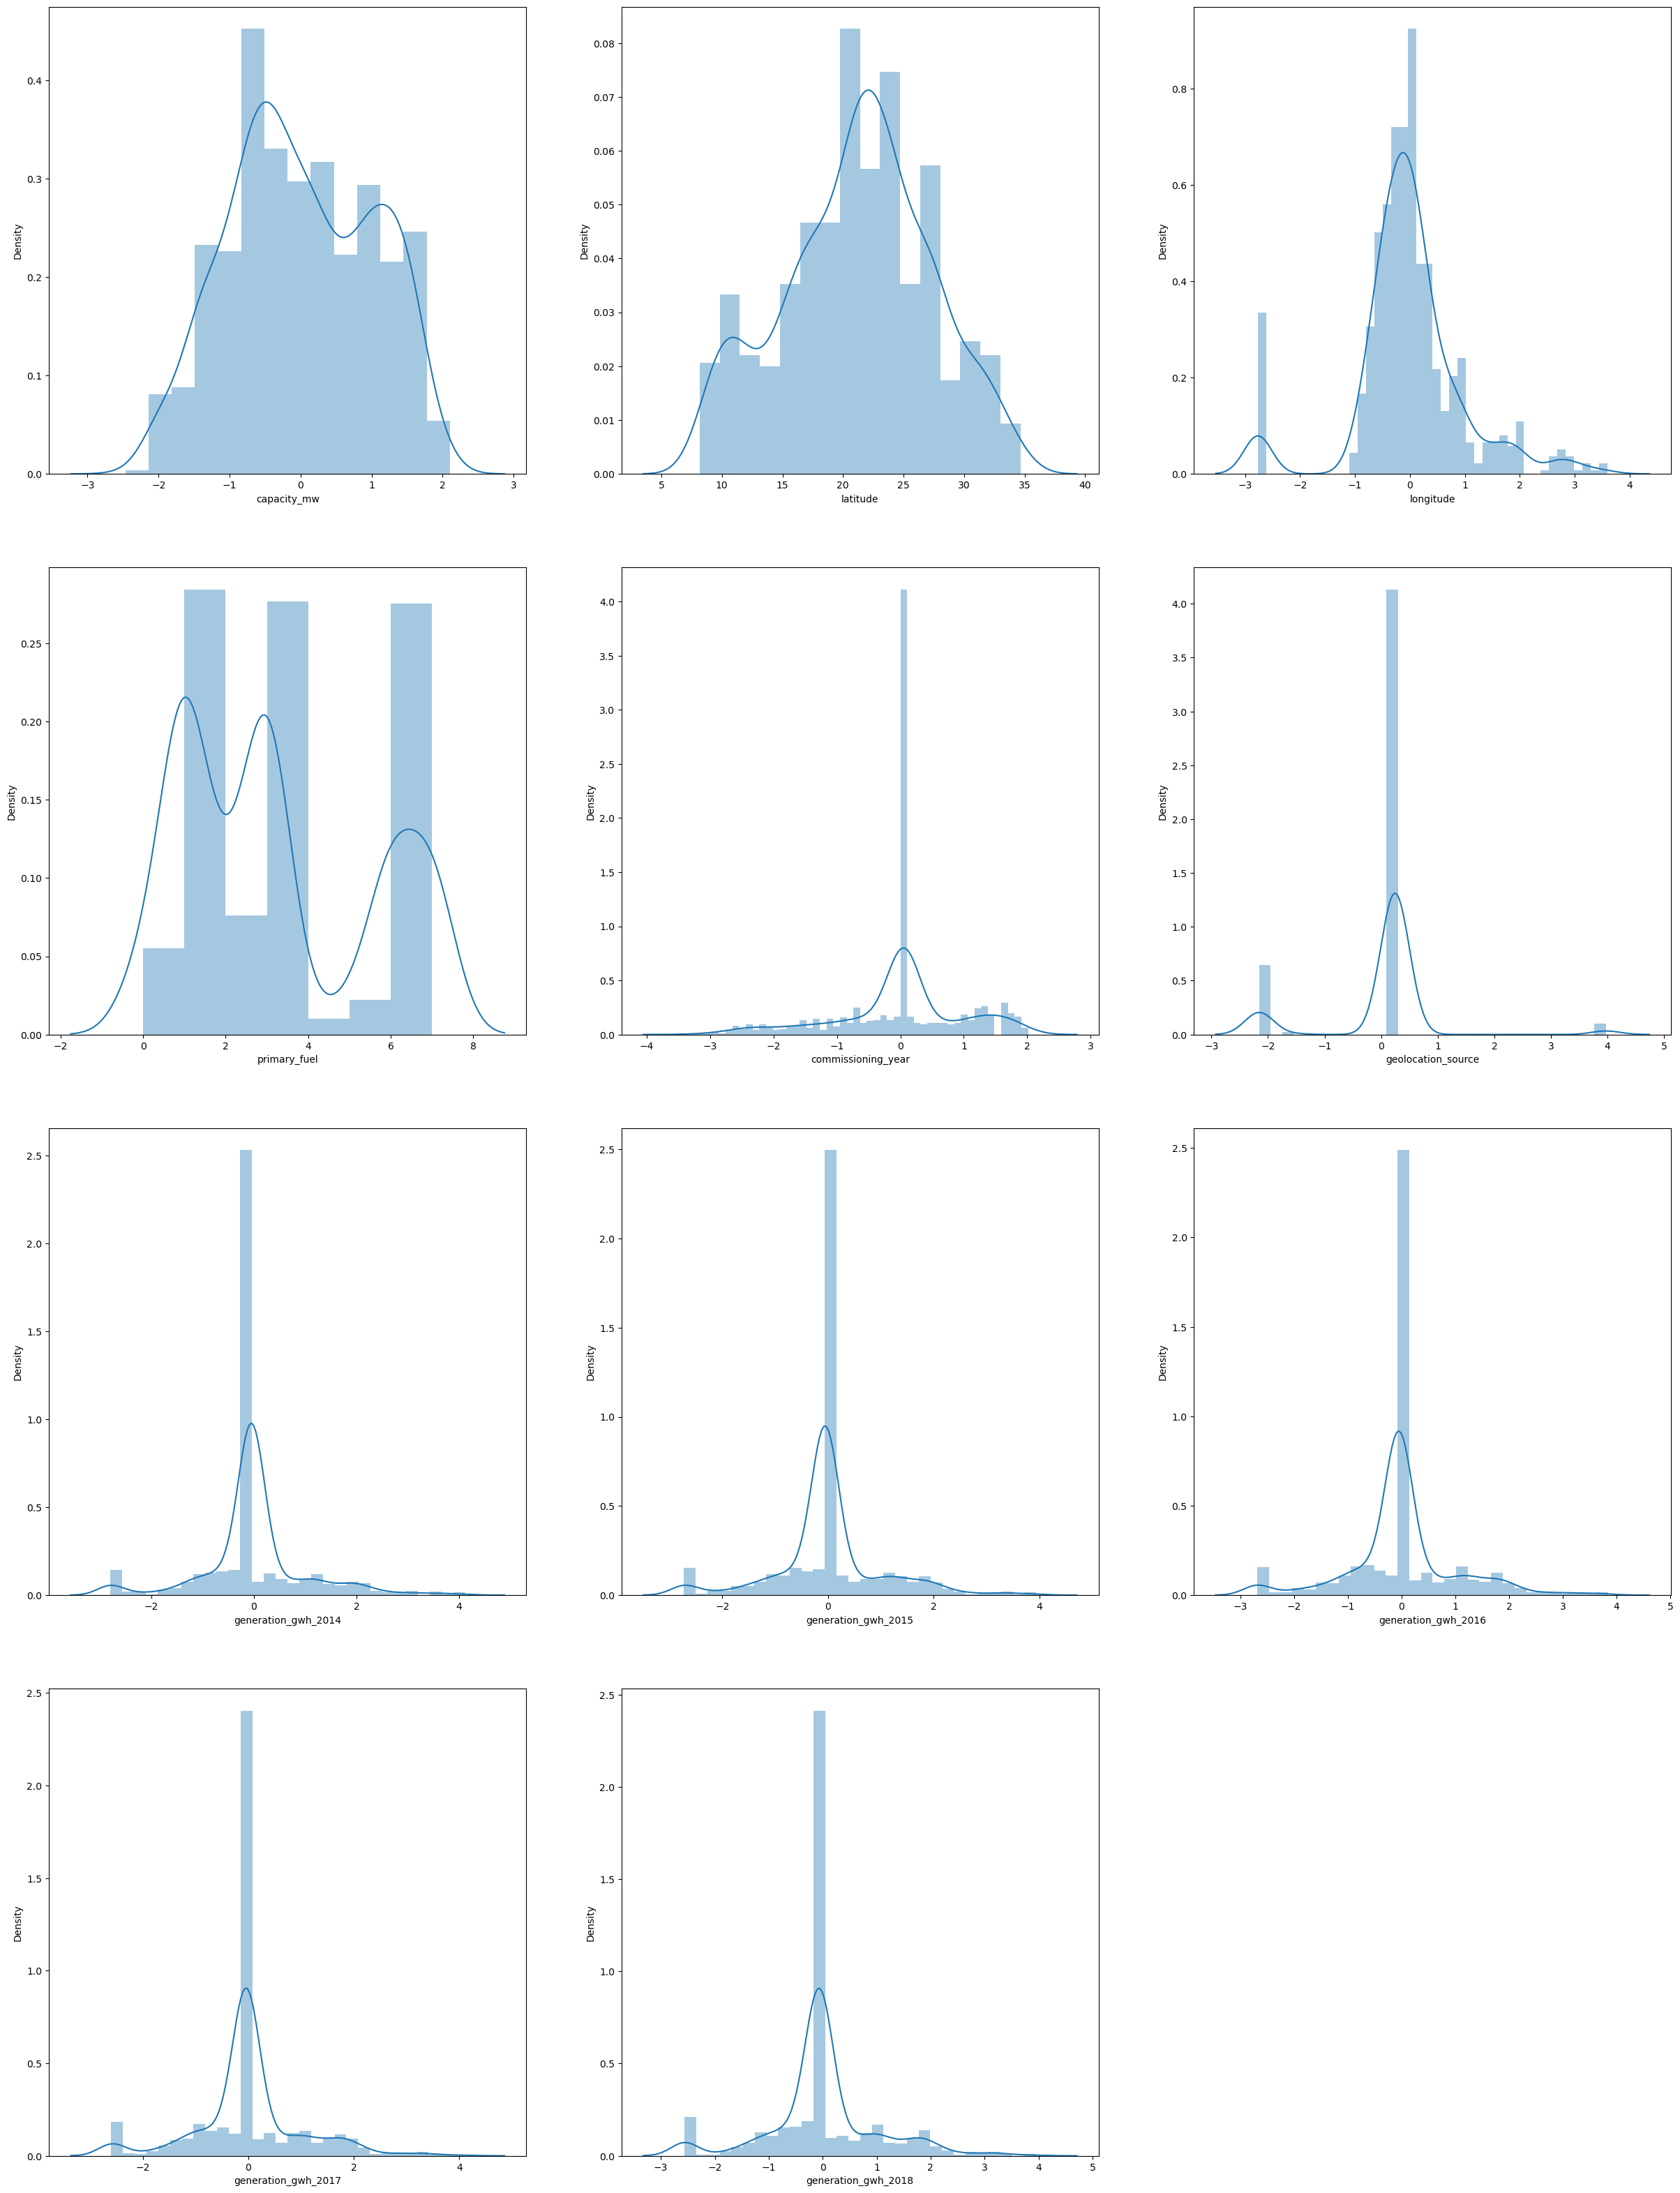

In [72]:
plt.figure(figsize=(30,40))
plotnum=1
for i in df.columns:
    ax = plt.subplot(4,3,plotnum)
    sns.distplot(df[i]) 
    plotnum+=1
plt.show()

# 1) Primary Fuel as Target (Classification Model)

In [73]:
X = df.drop(['primary_fuel'], axis=1)
y = df['primary_fuel']

In [74]:
Scaler = StandardScaler()
X_scalar = Scaler.fit_transform(X)



# Finding Best Random State

In [76]:
#Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,150):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state= i)
    RFR=RandomForestClassifier()
    RFR.fit(X_train,y_train)
    pred=RFR.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is ',maxAccu,'at random state ',maxRS)

Best Accuracy is  0.8681318681318682 at random state  15


# Training & Testing of Data

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=15)

In [78]:
X

,capacity_mw,latitude,longitude,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,-1.695767,28.1839,-0.473192,1.113530,-1.550925,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
1,0.193694,24.7663,-0.303176,0.053562,0.244573,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
2,-0.292337,21.9038,-0.907185,0.053562,0.244573,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
3,0.360998,23.8712,2.614543,0.346488,0.244573,-0.243102,0.072704,0.083178,-0.185637,-0.184018
4,1.649503,21.9603,0.849294,1.610143,0.244573,1.152947,1.836146,1.842814,1.621580,1.919439
...,...,...,...,...,...,...,...,...,...,...
902,1.593509,16.2949,0.066051,1.741534,0.244573,-0.046742,-2.579263,-0.782355,0.001238,-0.122761
903,-1.615576,12.8932,0.182063,0.053562,-2.154019,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
904,-0.522773,15.2758,-0.176879,0.053562,0.244573,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174
905,0.086915,24.3500,-0.411238,0.053562,0.244573,-0.046742,-0.052449,-0.050215,-0.039359,-0.061174


In [79]:
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 907, dtype: int32

# Applying various models

In [85]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_auc_score,precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split

lg=LogisticRegression()
lg.fit(X_train,y_train)
predlg=lg.predict(X_test)
print('Accuracy score is: ',accuracy_score(y_test,predlg),'%')

for i in range(2,15):
    cvs = cross_val_score(lg,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predlg))
print('\n Classification Report: \n',classification_report(y_test,predlg))

Accuracy score is:  0.6227106227106227 %
Cross Validation Score for cv= 2 is 0.6009009928912488
Cross Validation Score for cv= 3 is 0.6064046802031197
Cross Validation Score for cv= 4 is 0.6064285992748821
Cross Validation Score for cv= 5 is 0.6086333555946816
Cross Validation Score for cv= 6 is 0.6097072150575115
Cross Validation Score for cv= 7 is 0.6086975040463413
Cross Validation Score for cv= 8 is 0.6086593696630958
Cross Validation Score for cv= 9 is 0.6042464246424644
Cross Validation Score for cv= 10 is 0.6086935286935288
Cross Validation Score for cv= 11 is 0.6075521598589481
Cross Validation Score for cv= 12 is 0.6098684210526316
Cross Validation Score for cv= 13 is 0.6075648988692467
Cross Validation Score for cv= 14 is 0.6042925824175824

 Confusion Matrix: 
 [[ 0  0  0  0  0  0  0 14]
 [ 0 50  2 21  0  0  1  4]
 [ 0  8  3  4  0  0  0  3]
 [ 0 20  0 58  0  0  0  5]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  2  1  0  1  0  1]
 [ 0  0  0  0  0  0 34  0]
 [ 0  5  0 11  0  0  0 24]]


In [89]:
#Using Lasso Regularization

from sklearn.linear_model import LinearRegression, Lasso, Ridge
ls=Lasso()
ls.fit(X_train,y_train)
predls=ls.predict(X_test)
#print('Accuracy score is: ',accuracy_score(y_test,predls),'%')

for i in range(2,15):
    cvs = cross_val_score(ls,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

#print('\n Confusion Matrix: \n',confusion_matrix(y_test,predls))
#print('\n Classification Report: \n',classification_report(y_test,predls))


Cross Validation Score for cv= 2 is 0.09374956480788199
Cross Validation Score for cv= 3 is 0.08097011192280978
Cross Validation Score for cv= 4 is 0.09259358298316644
Cross Validation Score for cv= 5 is 0.07910241286452627
Cross Validation Score for cv= 6 is 0.07187360323068526
Cross Validation Score for cv= 7 is 0.06839055065241322
Cross Validation Score for cv= 8 is 0.07576819852476689
Cross Validation Score for cv= 9 is 0.05938043802649914
Cross Validation Score for cv= 10 is 0.024797980744326886
Cross Validation Score for cv= 11 is 0.06210503922658752
Cross Validation Score for cv= 12 is -0.017164371787955712
Cross Validation Score for cv= 13 is 0.07423226171760607
Cross Validation Score for cv= 14 is -0.011776080372942643


In [92]:
#Using Ridge Regularization

ri=Ridge()
ri.fit(X_train,y_train)
predri=ri.predict(X_test)
#print('Accuracy score is: ',accuracy_score(y_test,predri),'%')

for i in range(2,15):
    cvs = cross_val_score(ri,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

#print('\n Confusion Matrix: \n',confusion_matrix(y_test,predri))
#print('\n Classification Report: \n',classification_report(y_test,predri))

Cross Validation Score for cv= 2 is 0.31562546185254176
Cross Validation Score for cv= 3 is 0.30797055355396585
Cross Validation Score for cv= 4 is 0.32038791710747816
Cross Validation Score for cv= 5 is 0.3088012717486496
Cross Validation Score for cv= 6 is 0.29437771376990296
Cross Validation Score for cv= 7 is 0.30707878711041964
Cross Validation Score for cv= 8 is 0.31382640089741465
Cross Validation Score for cv= 9 is 0.29082879419847274
Cross Validation Score for cv= 10 is 0.2624892213283446
Cross Validation Score for cv= 11 is 0.29447564422331163
Cross Validation Score for cv= 12 is 0.201379888399295
Cross Validation Score for cv= 13 is 0.3023568040145699
Cross Validation Score for cv= 14 is 0.22340339696656888


In [93]:
# Using Random Forest classifier:

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
predRF=RF.predict(X_test)
print('Accuracy score is: ',accuracy_score(y_test,predRF),'%')

for i in range(2,15):
    cvs = cross_val_score(RF,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predRF))
print('\n Classification Report: \n',classification_report(y_test,predRF))

Accuracy score is:  0.8644688644688645 %
Cross Validation Score for cv= 2 is 0.8092744405869825
Cross Validation Score for cv= 3 is 0.8158882113376901
Cross Validation Score for cv= 4 is 0.8181016334645823
Cross Validation Score for cv= 5 is 0.8313702871713922
Cross Validation Score for cv= 6 is 0.8258321714883236
Cross Validation Score for cv= 7 is 0.8302751512053836
Cross Validation Score for cv= 8 is 0.8236492780624126
Cross Validation Score for cv= 9 is 0.8280528052805282
Cross Validation Score for cv= 10 is 0.8401831501831503
Cross Validation Score for cv= 11 is 0.8259690647289823
Cross Validation Score for cv= 12 is 0.8203654970760234
Cross Validation Score for cv= 13 is 0.8291925465838509
Cross Validation Score for cv= 14 is 0.8258070054945055

 Confusion Matrix: 
 [[10  3  0  0  0  0  0  1]
 [ 0 68  1  3  0  1  0  5]
 [ 1  4  7  5  0  1  0  0]
 [ 0  1  1 81  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  4  0  0  1  0  0]
 [ 0  0  0  0  0  0 34  0]
 [ 2  3  0  0  0  0  0 35]]


In [97]:
# Using XG Booster:

from xgboost import XGBClassifier
XG=XGBClassifier()
XG.fit(X_train,y_train)
predXG=XG.predict(X_test)
print('Accuracy score is: ',accuracy_score(y_test,predXG),'%')

for i in range(2,15):
    cvs = cross_val_score(XG,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predXG))
print('\n Classification Report: \n',classification_report(y_test,predXG))

Accuracy score is:  0.8608058608058609 %
Cross Validation Score for cv= 2 is 0.8026519240306911
Cross Validation Score for cv= 3 is 0.8214106178829804
Cross Validation Score for cv= 4 is 0.8313418580172314
Cross Validation Score for cv= 5 is 0.8236294092647685
Cross Validation Score for cv= 6 is 0.8236101429069361
Cross Validation Score for cv= 7 is 0.8181276088252831
Cross Validation Score for cv= 8 is 0.8291123272783729
Cross Validation Score for cv= 9 is 0.8302530253025303
Cross Validation Score for cv= 10 is 0.8280097680097681
Cross Validation Score for cv= 11 is 0.825915635936206
Cross Validation Score for cv= 12 is 0.822543859649123
Cross Validation Score for cv= 13 is 0.8291288421723204
Cross Validation Score for cv= 14 is 0.8323660714285716

 Confusion Matrix: 
 [[10  3  0  0  0  0  0  1]
 [ 0 68  1  4  0  1  0  4]
 [ 0  6  5  6  0  0  0  1]
 [ 0  2  2 79  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  0  0  4  0  0]
 [ 0  0  0  0  0  0 34  0]
 [ 3  1  1  0  0  0  0 35]]

 

In [98]:
# Using SVC model:

from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
predsvc=svc.predict(X_test)
print('Accuracy score is: ',accuracy_score(y_test,predsvc),'%')

for i in range(2,15):
    cvs = cross_val_score(svc,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,predsvc))
print('\n Classification Report: \n',classification_report(y_test,predsvc))

Accuracy score is:  0.6446886446886447 %
Cross Validation Score for cv= 2 is 0.73761073995196
Cross Validation Score for cv= 3 is 0.7419914176848149
Cross Validation Score for cv= 4 is 0.747534209192624
Cross Validation Score for cv= 5 is 0.7486369983607553
Cross Validation Score for cv= 6 is 0.7497531079354015
Cross Validation Score for cv= 7 is 0.7519550217224636
Cross Validation Score for cv= 8 is 0.7486221083682658
Cross Validation Score for cv= 9 is 0.7508250825082509
Cross Validation Score for cv= 10 is 0.753052503052503
Cross Validation Score for cv= 11 is 0.7475489541313816
Cross Validation Score for cv= 12 is 0.7475438596491228
Cross Validation Score for cv= 13 is 0.746424589902851
Cross Validation Score for cv= 14 is 0.7530219780219779

 Confusion Matrix: 
 [[ 0  8  0  6  0  0  0  0]
 [ 0 68  0 10  0  0  0  0]
 [ 0 11  0  7  0  0  0  0]
 [ 0 12  0 71  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  2  0  3  0  0  0  0]
 [ 0  0  0  3  0  0 31  0]
 [ 0 15  0 19  0  0  0  6]]

 Cla

In [99]:
# Using Decision Tree model:

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
print('Accuracy score is: ',accuracy_score(y_test,preddtc),'%')

for i in range(2,15):
    cvs = cross_val_score(dtc,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n',confusion_matrix(y_test,preddtc))
print('\n Classification Report: \n',classification_report(y_test,preddtc))

Accuracy score is:  0.8058608058608059 %
Cross Validation Score for cv= 2 is 0.7386901809765538
Cross Validation Score for cv= 3 is 0.7783934022541327
Cross Validation Score for cv= 4 is 0.767387236365054
Cross Validation Score for cv= 5 is 0.7893995507255176
Cross Validation Score for cv= 6 is 0.8081648658069014
Cross Validation Score for cv= 7 is 0.775091575091575
Cross Validation Score for cv= 8 is 0.7971782331936035
Cross Validation Score for cv= 9 is 0.7938943894389439
Cross Validation Score for cv= 10 is 0.7873015873015873
Cross Validation Score for cv= 11 is 0.7883284802179894
Cross Validation Score for cv= 12 is 0.7761842105263158
Cross Validation Score for cv= 13 is 0.78179646440516
Cross Validation Score for cv= 14 is 0.775154532967033

 Confusion Matrix: 
 [[10  2  0  0  0  0  0  2]
 [ 2 61  3  4  4  1  0  3]
 [ 1  5  5  6  0  0  0  1]
 [ 0  8  2 73  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  3  0  0  2  0  0]
 [ 0  0  0  0  0  0 34  0]
 [ 0  4  1  0  0  0  0 35]]

 Cla

# After several model performances, XG Boost Classifier has the best accuracy score of 86 % with CV score of 84%.

# Hyperparameter tuning the model

In [100]:
from sklearn.model_selection import GridSearchCV

In [102]:
estimator = XGBClassifier(nthread =4, seed=41)
params= {'n_estimators':range(10,30,5), 'max_depth':range(1,9,2), 'learning_rate':[0.01,0.05, 0.10]}

In [103]:
XG_grid = GridSearchCV(estimator=estimator, param_grid=params, n_jobs=2,verbose=2, cv =9)

XG_grid.fit(X_train, y_train)
y_pred = XG_grid.predict(X_test)
print("********************The Results*************************")
print('Accuracy Score: ', accuracy_score(y_test, y_pred)*100,'%')
cvs = cross_val_score(XG_grid,X_scalar, y,cv =14) 
print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('\n Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('\n Classification report: \n', classification_report(y_test, y_pred))

print('*'*70)

Fitting 9 folds for each of 48 candidates, totalling 432 fits
********************The Results*************************
Accuracy Score:  84.61538461538461 %
Fitting 9 folds for each of 48 candidates, totalling 432 fits
Fitting 9 folds for each of 48 candidates, totalling 432 fits
Fitting 9 folds for each of 48 candidates, totalling 432 fits
Fitting 9 folds for each of 48 candidates, totalling 432 fits
Fitting 9 folds for each of 48 candidates, totalling 432 fits
Fitting 9 folds for each of 48 candidates, totalling 432 fits
Fitting 9 folds for each of 48 candidates, totalling 432 fits
Fitting 9 folds for each of 48 candidates, totalling 432 fits
Fitting 9 folds for each of 48 candidates, totalling 432 fits
Fitting 9 folds for each of 48 candidates, totalling 432 fits
Fitting 9 folds for each of 48 candidates, totalling 432 fits
Fitting 9 folds for each of 48 candidates, totalling 432 fits
Fitting 9 folds for each of 48 candidates, totalling 432 fits
Fitting 9 folds for each of 48 candida

# Saving the model

In [104]:
import joblib
joblib.dump(XG,'Project_Global Power Plant.pkl')

['Project_Global Power Plant.pkl']

# Predicting the saved model

In [106]:
model=joblib.load('Project_Global Power Plant.pkl')

#Prediction
prediction=model.predict(X_test)
prediction

array([1, 0, 1, 7, 1, 7, 5, 1, 3, 7, 3, 1, 7, 6, 3, 3, 3, 3, 1, 7, 1, 7,
       7, 7, 6, 3, 1, 1, 7, 3, 3, 3, 1, 1, 2, 3, 6, 3, 2, 2, 3, 7, 7, 3,
       3, 3, 7, 3, 3, 1, 3, 1, 0, 3, 3, 3, 0, 1, 6, 6, 1, 3, 3, 0, 3, 1,
       7, 1, 6, 1, 3, 2, 3, 3, 6, 3, 0, 6, 7, 6, 7, 3, 3, 6, 3, 3, 7, 3,
       1, 1, 3, 1, 0, 6, 3, 7, 1, 1, 1, 1, 1, 1, 6, 3, 7, 1, 3, 1, 6, 7,
       7, 1, 3, 7, 6, 3, 3, 3, 6, 1, 6, 7, 6, 2, 7, 3, 6, 1, 7, 5, 3, 3,
       6, 3, 7, 1, 1, 6, 1, 1, 0, 1, 3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1,
       3, 3, 1, 5, 7, 1, 6, 2, 1, 3, 1, 1, 7, 5, 1, 1, 2, 6, 3, 0, 7, 3,
       6, 3, 7, 3, 3, 1, 3, 0, 1, 1, 3, 3, 1, 0, 7, 3, 7, 1, 6, 1, 1, 3,
       6, 1, 3, 0, 6, 7, 3, 1, 7, 1, 2, 3, 6, 1, 7, 3, 1, 3, 0, 7, 1, 1,
       3, 3, 3, 3, 5, 1, 1, 3, 1, 7, 3, 6, 1, 1, 1, 2, 6, 7, 3, 1, 3, 1,
       3, 1, 0, 1, 3, 7, 1, 7, 1, 6, 1, 3, 7, 3, 3, 6, 3, 1, 3, 3, 3, 1,
       7, 3, 6, 6, 3, 1, 1, 6, 3], dtype=int64)

# 2) Capacity_mw as Target Variable

In [107]:
X = df.drop(['capacity_mw'], axis=1)
y = df['capacity_mw']

In [108]:
Scaler = StandardScaler()
X_scalar = Scaler.fit_transform(X)

# Finding Best Random State

In [110]:
#Finding the best random state

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
maxAccu=0
maxRS=0
for i in range(1,150):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state= i)
    le=LinearRegression()
    le.fit(X_train,y_train)
    pred=le.predict(X_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is ',maxAccu,'at random state ',maxRS)

Best Accuracy is  0.5442838276532171 at random state  92


# Training & Testing of Data

In [111]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=92)

In [113]:
# Using Linear Regression

from sklearn.linear_model import LinearRegression

lg=LinearRegression()
lg.fit(X_train,y_train)
predlg=lg.predict(X_test)
print("r2 accuracy score is: ",r2_score(y_test,predlg))

for i in range(2,15):
    cvs = cross_val_score(lg,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(y_test,predlg))
print('\n Mean squared error:',mean_squared_error(y_test,predlg))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predlg)))

r2 accuracy score is:  0.5442838276532171
Cross Validation Score for cv= 2 is 0.44594833068858886
Cross Validation Score for cv= 3 is 0.43307111829601563
Cross Validation Score for cv= 4 is 0.4481442251617539
Cross Validation Score for cv= 5 is 0.44622159300164566
Cross Validation Score for cv= 6 is 0.44646445899670484
Cross Validation Score for cv= 7 is 0.426334951298656
Cross Validation Score for cv= 8 is 0.4496620171631083
Cross Validation Score for cv= 9 is 0.4351347621702948
Cross Validation Score for cv= 10 is 0.436198031058938
Cross Validation Score for cv= 11 is 0.44355371753045475
Cross Validation Score for cv= 12 is 0.43475727461148317
Cross Validation Score for cv= 13 is 0.4381343947264519
Cross Validation Score for cv= 14 is 0.4192024870552865

 Mean absolute error: 0.5880039158896432

 Mean squared error: 0.4942550197990864

 Root Mean squared error: 0.7030327302473808


In [115]:
# Using Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
predRF=RF.predict(X_test)
print("r2 accuracy score is: ",r2_score(y_test,predRF))

for i in range(2,15):
    cvs = cross_val_score(RF,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(y_test,predRF))
print('\n Mean squared error:',mean_squared_error(y_test,predRF))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predRF)))

r2 accuracy score is:  0.813468389075496
Cross Validation Score for cv= 2 is 0.7777798781644942
Cross Validation Score for cv= 3 is 0.7979022525622157
Cross Validation Score for cv= 4 is 0.7997207158692643
Cross Validation Score for cv= 5 is 0.8047438306677975
Cross Validation Score for cv= 6 is 0.8001823964490171
Cross Validation Score for cv= 7 is 0.7970943239856304
Cross Validation Score for cv= 8 is 0.8025421236764749
Cross Validation Score for cv= 9 is 0.7988806522283609
Cross Validation Score for cv= 10 is 0.8016577023916479
Cross Validation Score for cv= 11 is 0.8064684023859926
Cross Validation Score for cv= 12 is 0.7985054268671289
Cross Validation Score for cv= 13 is 0.8068716397727536
Cross Validation Score for cv= 14 is 0.8019453202445005

 Mean absolute error: 0.29775979254070445

 Mean squared error: 0.20230615160282242

 Root Mean squared error: 0.44978456132110894


In [116]:
# Using XGB Regression

from xgboost import XGBRegressor
xb=XGBRegressor()
xb.fit(X_train,y_train)
predxb=xb.predict(X_test)
print("r2 accuracy score is: ",r2_score(y_test,predxb))

for i in range(2,15):
    cvs = cross_val_score(xb,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(y_test,predxb))
print('\n Mean squared error:',mean_squared_error(y_test,predxb))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predxb)))

r2 accuracy score is:  0.7911765315934758
Cross Validation Score for cv= 2 is 0.7604043962564317
Cross Validation Score for cv= 3 is 0.7853033858857937
Cross Validation Score for cv= 4 is 0.7843666479492568
Cross Validation Score for cv= 5 is 0.7851135670402518
Cross Validation Score for cv= 6 is 0.7983077350045056
Cross Validation Score for cv= 7 is 0.7844778730410822
Cross Validation Score for cv= 8 is 0.789640716534144
Cross Validation Score for cv= 9 is 0.7801158718005775
Cross Validation Score for cv= 10 is 0.7911881964236921
Cross Validation Score for cv= 11 is 0.7814533810214116
Cross Validation Score for cv= 12 is 0.7925347572408706
Cross Validation Score for cv= 13 is 0.7892420346205855
Cross Validation Score for cv= 14 is 0.7899442423498764

 Mean absolute error: 0.32631321430597354

 Mean squared error: 0.22648317916889743

 Root Mean squared error: 0.4759024891392116


In [117]:
# Using Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
preddt=dt.predict(X_test)
print("r2 accuracy score is: ",r2_score(y_test,preddt))

for i in range(2,15):
    cvs = cross_val_score(dt,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())
    
print('\n Mean absolute error:',mean_absolute_error(y_test,preddt))
print('\n Mean squared error:',mean_squared_error(y_test,preddt))
print('\n Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddt)))

r2 accuracy score is:  0.7418626966990615
Cross Validation Score for cv= 2 is 0.645592910781443
Cross Validation Score for cv= 3 is 0.6803850652634873
Cross Validation Score for cv= 4 is 0.6551372140790255
Cross Validation Score for cv= 5 is 0.6919394137089869
Cross Validation Score for cv= 6 is 0.673067365752734
Cross Validation Score for cv= 7 is 0.6573573803302176
Cross Validation Score for cv= 8 is 0.6758992446795827
Cross Validation Score for cv= 9 is 0.6876908610579843
Cross Validation Score for cv= 10 is 0.6656896508490696
Cross Validation Score for cv= 11 is 0.6997301476827311
Cross Validation Score for cv= 12 is 0.6878116195922864
Cross Validation Score for cv= 13 is 0.6888009072355536
Cross Validation Score for cv= 14 is 0.6771990928118367

 Mean absolute error: 0.36025735486205773

 Mean squared error: 0.2799673693756918

 Root Mean squared error: 0.5291194282727594


XGB Regressor has the least difference between its accuracy score and its CV score. So, proceeding further to HyperParameter tuning for this model

# HyperParameter Tuning

In [118]:
parameter_grid = {
    'n_estimators': [100, 400, 800],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.05, 0.1, 0.20],
    'min_child_weight': [1, 10, 100],
    "criterion": ["gini", "entropy"]
    }

In [120]:
XG_rand = RandomizedSearchCV(estimator=xb, param_distributions=parameter_grid, n_jobs=2,verbose=2, cv =9)

XG_rand.fit(X_train, y_train)
y_pred = XG_rand.predict(X_test)

print("Accuracy: ",r2_score(y_test, y_pred)*100)
for i in range(2,10):
    cvs = cross_val_score(XG_rand,X_scalar, y,cv =i) 
    print('Cross Validation Score for cv=',i,'is', cvs.mean())

print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', np.sqrt(mean_squared_error(y_test, y_pred)))

print('*'*60)

Fitting 9 folds for each of 10 candidates, totalling 90 fits
Accuracy:  83.38374646909249
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Cross Validation Score for cv= 2 is 0.7944649738523073
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Cross Validation Score for cv= 3 is 0.807304810891534
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Cross Validation Score for cv= 4 is 0.8080913065736801
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 folds for each of 10 candidates, totalling 90 fits
Fitting 9 fold

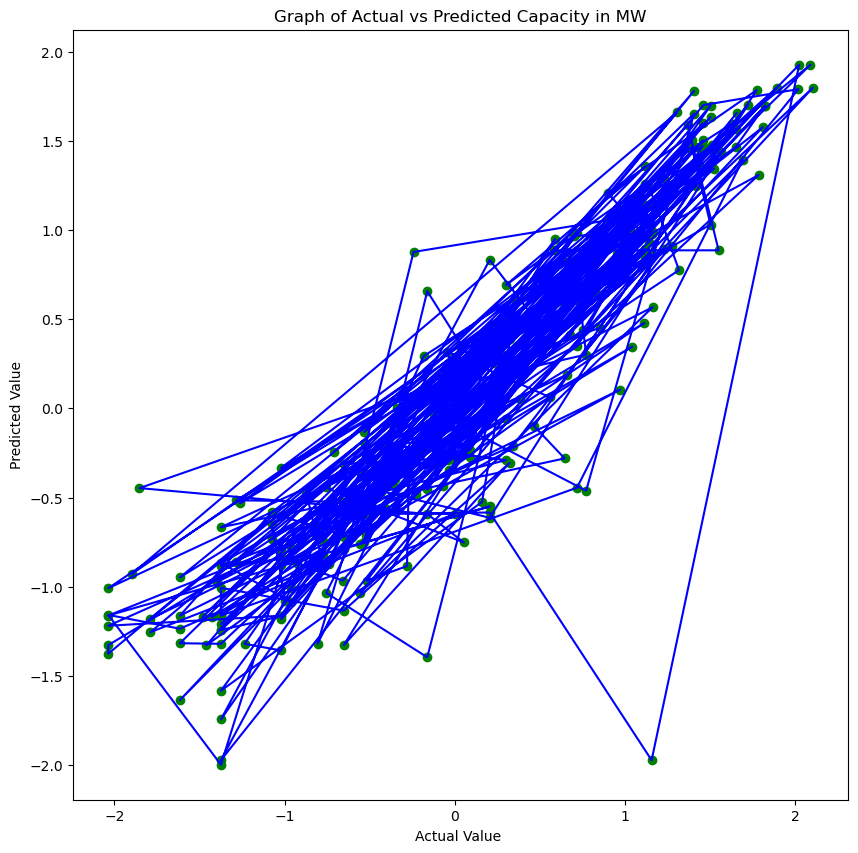

In [121]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test, y= y_pred, color='g')
plt.plot(y_test,y_pred, color='b')
plt.title("Graph of Actual vs Predicted Capacity in MW")
plt.xlabel('Actual Value ', fontsize= 10 )
plt.ylabel('Predicted Value', fontsize= 10)
plt.show()

# Saving the model

In [123]:
import joblib
joblib.dump(XG_rand,'Project_Global Power Plant1.pkl')

['Project_Global Power Plant1.pkl']

# Predicting the saved model

In [125]:
model=joblib.load('Project_Global Power Plant1.pkl')

#Prediction
prediction=model.predict(X_test)
prediction

array([-0.18430303, -0.19799463, -0.2902226 , -0.47083005,  1.2491155 ,
        1.055244  ,  0.8768973 , -0.5074283 , -0.7517334 , -0.592001  ,
       -0.4468624 ,  0.4510017 ,  1.7847428 ,  1.2079233 ,  0.93207896,
        1.1400877 , -1.6357634 ,  0.95079774,  1.7975004 , -0.32469168,
       -1.7439145 ,  0.20352446,  1.1247282 , -1.2102147 ,  1.5022719 ,
       -0.18430303, -0.34165698, -0.69791675, -1.1613537 , -0.54959893,
       -0.7868302 ,  0.10035457,  1.3640113 ,  1.452737  , -0.6044366 ,
       -0.7222535 , -1.0841333 , -0.86709064,  0.05006331, -0.3141635 ,
       -0.05822517,  0.34589392, -0.58420044, -0.88365304, -0.817853  ,
       -1.1577132 ,  0.8921635 , -0.20965268, -1.2187507 , -1.1621655 ,
        0.09422282,  0.65702415, -0.68247455,  1.6959025 ,  1.3820804 ,
       -0.58420044, -0.59205055, -1.2546297 ,  0.36752856,  0.949531  ,
       -1.1662925 , -1.2423893 , -0.6044366 ,  0.8934359 , -0.7156102 ,
        0.10473585, -1.1805664 ,  1.0064106 ,  0.4088687 , -0.94